# EEG classification: Andrzejak's dataset (ZFS)

In [24]:
%%html
<!--hide_me_please-->

<p class="showoutput_report_view" id="first123456aa_article_view"><a href="javascript:output_report_or_work_toggle('#first123456_work_view')">show the report view</a></p>
<p class="showoutput_work_view" id="first123456_work_view"><a href="javascript:output_report_or_work_toggle('#first123456aa_article_view')">show the work view</a></p>

<p class="showcode" id="first123456aa"><a href="javascript:code_toggle('#first123456')">show codes in the notebook</a></p>
<p class="hidecode" id="first123456"><a href="javascript:code_toggle('#first123456aa')">hide codes in the notebook</a></p>

<p class="showoutput_text" id="first123456aa_text"><a href="javascript:output_text_toggle('#first123456_text')">show text outputs in the notebook</a></p>
<p class="hideoutput_text" id="first123456_text"><a href="javascript:output_text_toggle('#first123456aa_text')">hide text outputs in the notebook</a></p>

<IPython.core.display.Javascript object>

In [25]:
# hide_me_please
from IPython.display import HTML


def this_is_temporary_cell():
    cell_output_is_temporary()


def cell_output_is_temporary():
    HTML("<!--this_is_temporary_output-->")
    print("# this_is_temporary_output")

<IPython.core.display.Javascript object>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Initialization" data-toc-modified-id="1.-Initialization-1">1. Initialization</a></span></li><li><span><a href="#2.-Loading-data-and-adding-transformed-features" data-toc-modified-id="2.-Loading-data-and-adding-transformed-features-2">2. Loading data and adding transformed features</a></span><ul class="toc-item"><li><span><a href="#(Z),-(F),-(S)" data-toc-modified-id="(Z),-(F),-(S)-2.1">(Z), (F), (S)</a></span></li></ul></li><li><span><a href="#3.-Guo-et-al.-(2012)-basic-statistics-of-wavelet-decomposition-–-KNN" data-toc-modified-id="3.-Guo-et-al.-(2012)-basic-statistics-of-wavelet-decomposition-–-KNN-3">3. Guo et al. (2012) basic statistics of wavelet decomposition – KNN</a></span><ul class="toc-item"><li><span><a href="#3.1.-Parameters-selection" data-toc-modified-id="3.1.-Parameters-selection-3.1">3.1. Parameters selection</a></span></li><li><span><a href="#3.2.-Final-scores" data-toc-modified-id="3.2.-Final-scores-3.2">3.2. Final scores</a></span></li></ul></li><li><span><a href="#5.-AR-of-single-signal-–&nbsp;KNN" data-toc-modified-id="5.-AR-of-single-signal-–&nbsp;KNN-4">5. AR of single signal –&nbsp;KNN</a></span><ul class="toc-item"><li><span><a href="#5.1.-Parameters-selection" data-toc-modified-id="5.1.-Parameters-selection-4.1">5.1. Parameters selection</a></span><ul class="toc-item"><li><span><a href="#5.1.1.-Iteration-no.-1" data-toc-modified-id="5.1.1.-Iteration-no.-1-4.1.1">5.1.1. Iteration no. 1</a></span></li><li><span><a href="#5.1.2.-Iteration-no.-2" data-toc-modified-id="5.1.2.-Iteration-no.-2-4.1.2">5.1.2. Iteration no. 2</a></span></li></ul></li><li><span><a href="#5.2.-Final-scores" data-toc-modified-id="5.2.-Final-scores-4.2">5.2. Final scores</a></span></li></ul></li><li><span><a href="#6.-AR-based-PSD-of-single-signal-–-KNN" data-toc-modified-id="6.-AR-based-PSD-of-single-signal-–-KNN-5">6. AR-based PSD of single signal – KNN</a></span><ul class="toc-item"><li><span><a href="#6.1.-Parameters-selection" data-toc-modified-id="6.1.-Parameters-selection-5.1">6.1. Parameters selection</a></span><ul class="toc-item"><li><span><a href="#6.1.1.-Iteration-no.-1" data-toc-modified-id="6.1.1.-Iteration-no.-1-5.1.1">6.1.1. Iteration no. 1</a></span></li><li><span><a href="#6.1.2.-Iteration-no.-2" data-toc-modified-id="6.1.2.-Iteration-no.-2-5.1.2">6.1.2. Iteration no. 2</a></span></li></ul></li><li><span><a href="#6.2.-Final-scores" data-toc-modified-id="6.2.-Final-scores-5.2">6.2. Final scores</a></span></li></ul></li><li><span><a href="#7.-AR-of-single-signal-–&nbsp;logistic-regression" data-toc-modified-id="7.-AR-of-single-signal-–&nbsp;logistic-regression-6">7. AR of single signal –&nbsp;logistic regression</a></span><ul class="toc-item"><li><span><a href="#7.1.-Parameters-selection" data-toc-modified-id="7.1.-Parameters-selection-6.1">7.1. Parameters selection</a></span></li><li><span><a href="#7.2.-Final-scores" data-toc-modified-id="7.2.-Final-scores-6.2">7.2. Final scores</a></span></li></ul></li><li><span><a href="#8.-AR-of-single-signal-–&nbsp;MLP" data-toc-modified-id="8.-AR-of-single-signal-–&nbsp;MLP-7">8. AR of single signal –&nbsp;MLP</a></span><ul class="toc-item"><li><span><a href="#8.1.-Parameters-selection" data-toc-modified-id="8.1.-Parameters-selection-7.1">8.1. Parameters selection</a></span></li><li><span><a href="#8.2.-Final-scores" data-toc-modified-id="8.2.-Final-scores-7.2">8.2. Final scores</a></span></li></ul></li><li><span><a href="#9.-Models-performance-ranking" data-toc-modified-id="9.-Models-performance-ranking-8">9. Models performance ranking</a></span></li><li><span><a href="#END" data-toc-modified-id="END-9">END</a></span></li></ul></div>

## 1. Initialization

In [3]:
# !pip install ../timeseries/
# !pip install git+https://github.com/krzpiesiewicz/timeseries

In [4]:
# !pip uninstall timeseries

In [5]:
# pip install git+https://github.com/cesium-ml/cesium@12734dc885e350e2edfee215e4dc02087b15b877

In [6]:
# !pip install PyWavelets

In [7]:
# load extensions
%load_ext nb_black
%load_ext autoreload
%autoreload 2
%aimport timeseries

<IPython.core.display.Javascript object>

In [8]:
import IPython.display
from pprint import pprint
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import timeseries as tss
from timeseries import plot_ts
from timeseries.transform import IHSTransformer, get_smoothed

from cesium import datasets, featurize
import pywt

from codes.ar_psd import (
    ols,
    burg,
    ld_biased,
    ar_coeffs,
    psd_fun_from_ar,
    ar_features,
    psd_ar_features,
)
from codes.guo import guo_features
from codes.knn import knn_scores
from codes.logreg import logreg_scores
from codes.mlp import mlp_scores
from codes.selection import (
    start_timer,
    set_work,
    print_progress,
    print_res,
    sorted_by_score,
    simple_scorings,
    full_scorings,
)

<IPython.core.display.Javascript object>

In [9]:
# import warnings

# warnings.filterwarnings("ignore")
plt.rcParams.update(
    {
        "figure.max_open_warning": 0,
    }
)

<IPython.core.display.Javascript object>

## 2. Loading data and adding transformed features

### (Z), (F), (S)

In [10]:
eeg = datasets.fetch_andrzejak()

###Group together classes (Z, O), (N, F), (S) as normal, interictal, ictal
eeg["classes"] = eeg["classes"].astype("U16")  #  allocate memory for longer class names
mask = ~np.logical_or(eeg["classes"] == "O", eeg["classes"] == "N")
ids = np.where(mask)[0]
eeg["measurements"] = [eeg["measurements"][i] for i in ids]
eeg["classes"] = eeg["classes"][mask]
eeg["classes"][eeg["classes"] == "Z"] = "Normal"
eeg["classes"][eeg["classes"] == "F"] = "Interictal"
eeg["classes"][eeg["classes"] == "S"] = "Ictal"

Loaded data from cached archive.


<IPython.core.display.Javascript object>

In [11]:
trans_ids = np.where(eeg["classes"] == "Normal")[0]

<IPython.core.display.Javascript object>

In [12]:
np.unique(eeg["classes"], return_counts=True)

(array(['Ictal', 'Interictal', 'Normal'], dtype='<U16'),
 array([100, 100, 100]))

<IPython.core.display.Javascript object>

In [13]:
select_params_idx, eval_idx, _, _ = train_test_split(
    np.arange(0, len(eeg["classes"])), eeg["classes"], random_state=7, train_size=100
)
select_params_idx = pd.Index(np.sort(select_params_idx))
eval_idx = pd.Index(np.sort(eval_idx))

<IPython.core.display.Javascript object>

In [14]:
len(select_params_idx)

100

<IPython.core.display.Javascript object>

In [15]:
len(eval_idx)

200

<IPython.core.display.Javascript object>

In [16]:
train_size = 90

<IPython.core.display.Javascript object>

In [17]:
sampling_freq = 173.6  # Hz

<IPython.core.display.Javascript object>

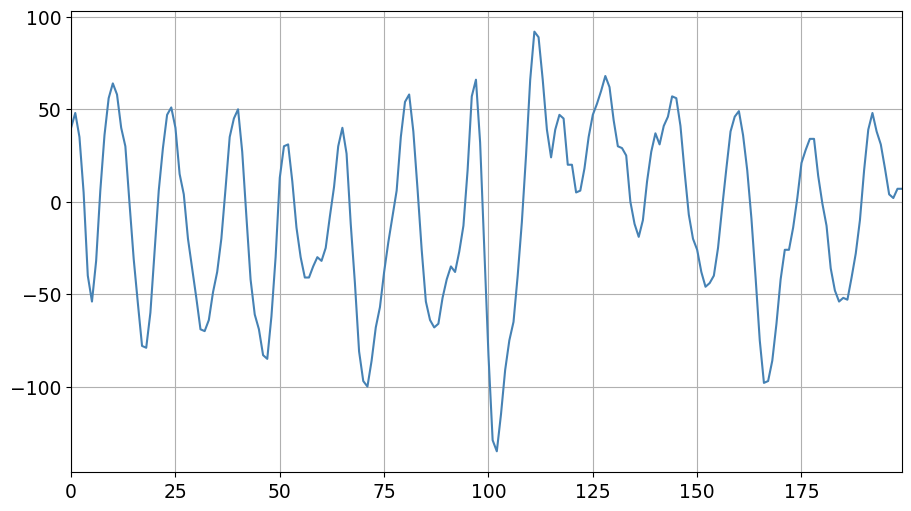

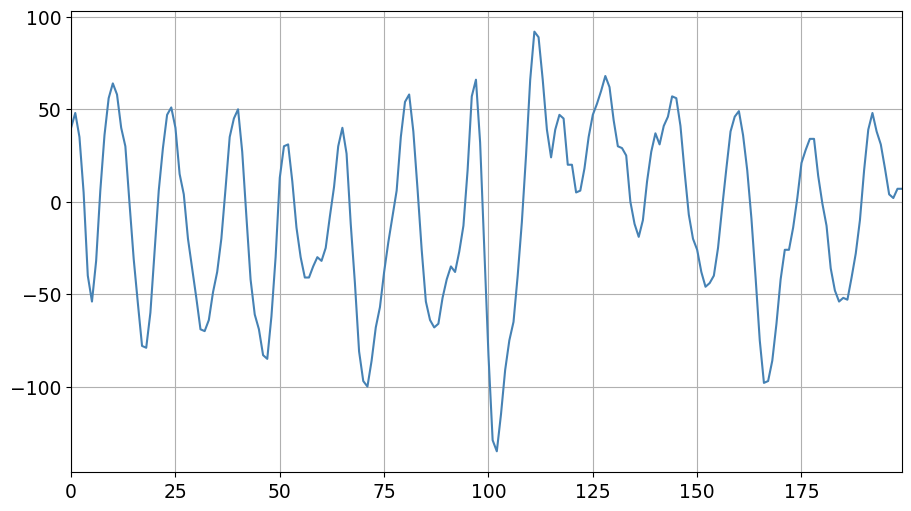

<IPython.core.display.Javascript object>

In [18]:
ts = eeg["measurements"][0][:200]
fig = plot_ts(ts)
fig

In [19]:
n_channels = 4
eeg["dwts"] = [
    pywt.wavedec(
        m,
        pywt.Wavelet("db1"),
        level=n_channels - 1,
    )
    for m in eeg["measurements"]
]

<IPython.core.display.Javascript object>

In [20]:
%%time
# standard normalization
transformation_train_intv = tss.Interval(eeg["measurements"][0], 0, 1000)
standard_trans = [
    IHSTransformer(transformation_train_intv.view(ts), d=0, lmb=None, verbose=True) for ts in eeg["measurements"]
]
eeg["measurements_normed"] = [trans.transform(ts) for ts, trans in zip(eeg["measurements"], standard_trans)]

CPU times: user 948 ms, sys: 6.4 ms, total: 955 ms
Wall time: 958 ms


<IPython.core.display.Javascript object>

In [29]:
# %%time
# # IHS normalization
# ihs_trans = [
#     IHSTransformer(transformation_train_intv.view(ts), d=0, verbose=True) for ts in eeg["measurements"]
# ]

<IPython.core.display.Javascript object>

In [26]:
# [trans.lmb for trans in ihs_trans]

<IPython.core.display.Javascript object>

In [28]:
this_is_temporary_cell()

lmbs = [
    None,
    0.0034500000000000012,
    None,
    None,
    None,
    None,
    None,
    None,
    None,
    0.008150000000000003,
    None,
    None,
    None,
    0.010624999999999999,
    0.012249999999999997,
    0.011625,
    None,
    None,
    None,
    None,
    None,
    None,
    0.012187499999999997,
    None,
    None,
    0.0074500000000000035,
    None,
    0.006050000000000002,
    0.009150000000000004,
    None,
    0.014124999999999995,
    None,
    None,
    None,
    0.007850000000000003,
    None,
    None,
    None,
    None,
    0.006150000000000003,
    None,
    None,
    0.009850000000000003,
    None,
    0.0119375,
    None,
    None,
    0.010031249999999999,
    0.004950000000000001,
    None,
    0.007350000000000002,
    None,
    None,
    None,
    None,
    None,
    None,
    None,
    None,
    None,
    None,
    0.006450000000000003,
    None,
    0.008150000000000003,
    0.012562499999999997,
    None,
    0.014562499999999996,
    None,
    None,
    None,
    None,
    0.007950000000000004,
    None,
    None,
    None,
    0.01075,
    None,
    None,
    None,
    0.007650000000000003,
    None,
    0.006350000000000002,
    0.007675000000000003,
    None,
    0.005350000000000002,
    0.003750000000000001,
    None,
    None,
    None,
    None,
    None,
    0.010249999999999999,
    0.0074500000000000035,
    None,
    0.009250000000000003,
    0.005775000000000002,
    None,
    None,
    None,
    None,
    None,
    0.011625,
    None,
    None,
    0.004925000000000001,
    None,
    0.008950000000000005,
    0.03356249999999998,
    0.0040906250000000005,
    0.012671874999999997,
    0.012843749999999998,
    None,
    None,
    0.011125,
    None,
    0.005550000000000002,
    None,
    0.005650000000000002,
    0.016531249999999994,
    0.016437499999999994,
    0.006212500000000003,
    None,
    0.005650000000000002,
    0.004075000000000001,
    0.004850000000000002,
    0.03406249999999998,
    0.003150000000000001,
    0.013312499999999998,
    0.015562499999999993,
    0.004237500000000002,
    0.004575000000000002,
    0.010593749999999999,
    None,
    0.016499999999999994,
    None,
    None,
    None,
    None,
    None,
    None,
    0.028937499999999984,
    None,
    None,
    0.005125000000000002,
    0.006250000000000002,
    None,
    None,
    None,
    None,
    0.01078125,
    None,
    None,
    0.009050000000000004,
    0.006650000000000003,
    None,
    None,
    0.009275000000000002,
    None,
    None,
    None,
    0.0016500000000000004,
    0.016874999999999994,
    0.012984374999999998,
    0.010093749999999999,
    0.010312499999999999,
    0.017593749999999995,
    None,
    None,
    0.007550000000000003,
    0.005575000000000002,
    0.016374999999999994,
    0.016812499999999994,
    0.002450000000000001,
    None,
    None,
    0.0044906250000000016,
    0.008250000000000004,
    None,
    0.002950000000000001,
    None,
    None,
    None,
    None,
    None,
    0.010499999999999999,
    0.007575000000000004,
    None,
    None,
    0.004375000000000001,
    None,
    None,
    0.009050000000000004,
    None,
    0.008050000000000003,
    0.0047500000000000025,
    0.005825000000000002,
    None,
    0.010312499999999999,
    0.015249999999999996,
    None,
    0.003062500000000001,
    0.0017687500000000004,
    None,
    None,
    None,
    None,
    None,
    0.000755,
    None,
    None,
    0.00115,
    None,
    None,
    None,
    0.002725000000000001,
    0.0015656250000000002,
    0.008637500000000003,
    0.01134375,
    None,
    0.00113125,
    None,
    None,
    None,
    0.008862500000000004,
    0.0016500000000000004,
    None,
    0.0043500000000000014,
    0.002712500000000001,
    None,
    0.003150000000000001,
    None,
    0.0015625,
    0.0016687500000000003,
    None,
    None,
    None,
    0.0020250000000000008,
    None,
    None,
    None,
    0.0015437500000000002,
    None,
    None,
    None,
    0.008587500000000003,
    None,
    None,
    0.0013875000000000003,
    0.002937500000000001,
    0.015843749999999993,
    None,
    0.0019187500000000005,
    None,
    0.0017562500000000002,
    None,
    None,
    None,
    None,
    None,
    None,
    None,
    None,
    0.0034875000000000014,
    0.0013875000000000003,
    None,
    None,
    0.0021375000000000005,
    None,
    None,
    None,
    0.0015187500000000004,
    None,
    None,
    0.000725,
    None,
    None,
    None,
    0.0020500000000000006,
    0.004887500000000001,
    None,
    None,
    None,
    0.004937500000000001,
    None,
    None,
    None,
    0.010249999999999999,
    None,
    None,
    None,
    0.0020031250000000006,
    None,
    None,
    0.0020750000000000005,
    None,
    None,
    None,
    0.0018500000000000005,
    None,
    0.0015625,
]

ihs_trans = [
    IHSTransformer(transformation_train_intv.view(ts), d=0, lmb=lmb, verbose=True)
    for ts, lmb in zip(eeg["measurements"], lmbs)
]

# this_is_temporary_output


<IPython.core.display.Javascript object>

In [29]:
eeg["measurements_ihs"] = [
    trans.transform(ts) for ts, trans in zip(eeg["measurements"], ihs_trans)
]

<IPython.core.display.Javascript object>

In [ ]:
# this_is_temporary_cell()
# ihs_trans_lst = []
# for trans_idx in trans_idx:
#     ihs_trans_inst = IHSTransformer(
#         pd.Series(eeg["measurements_normed"][trans_idx]), verbose=True, d=0
#     )
#     if ihs_trans_inst.lmb is not None:
#         ihs_trans_lst.append(ihs_trans_inst)

In [ ]:
# this_is_temporary_cell()
# lmbs = [ihs_trans.lmb for ihs_trans in ihs_trans_lst]
# means = [ihs_trans.mean for ihs_trans in ihs_trans_lst]
# stds = [ihs_trans.std for ihs_trans in ihs_trans_lst]

In [ ]:
# this_is_temporary_cell()
# lmbs

In [ ]:
# this_is_temporary_cell()
# lmbs = [lmb for lmb in lmbs if lmb < 1]

In [ ]:
# this_is_temporary_cell()
# mean_lmb = np.mean(lmbs)
# mean_std = np.mean(stds)
# means_mean = np.mean(means)

In [ ]:
# this_is_temporary_cell()
# ihs_trans = IHSTransformer(
#     pd.Series(eeg["measurements_normed"][trans_idx]), lmb=mean_lmb, d=0
# )
# ihs_trans.mean = means_mean
# ihs_trans.std = mean_std

In [ ]:
# this_is_temporary_cell()
# %%time

# eeg["measurements_ihs"] = eeg["measurements_normed"].copy()
# for i in range(len(eeg["measurements_ihs"])):
#     eeg["measurements_ihs"][i] = ihs_trans.transform(
#         pd.Series(eeg["measurements_ihs"][i])
#     ).values

## 3. Guo et al. (2012) basic statistics of wavelet decomposition – KNN

In [30]:
fset_dwt = featurize.featurize_time_series(
    times=None,
    values=eeg["dwts"],
    errors=None,
    features_to_use=list(guo_features.keys()),
    custom_functions=guo_features,
)

<IPython.core.display.Javascript object>

### 3.1. Parameters selection

In [31]:
%%time
metrics = [
    "cosine",
    "manhattan",
    "l1",
    "l2",
    "cityblock",
    "braycurtis",
    "correlation",
    "minkowski",
    "sqeuclidean",
]
ns_for_knn = [n for n in range(3, 16)]

dwt_select_scores = knn_scores(
    fset_dwt,
    "Wavelet transform features",
    classes=eeg["classes"],
    eval_idx=select_params_idx,
    train_size=train_size,
    cv=1,
    model_random_state=[i for i in range(10, 40)],
    n=ns_for_knn,
    metrics=metrics,
    scorings_dct=simple_scorings,
    print_scores=False,
    metric_in_key=True,
)

CPU times: user 3min 2s, sys: 655 ms, total: 3min 2s
Wall time: 1min 5s


<IPython.core.display.Javascript object>

In [32]:
sorted_select_res = sorted_by_score(dwt_select_scores, ["test_acc", "test_bacc"])

<IPython.core.display.Javascript object>

In [33]:
print_res(sorted_select_res[:5])

KNN(K= 3), metric: braycurtis , random_splits: 30
Wavelet transform features ------ train_acc: 97.04%, train_bacc: 96.91%, test_acc: 96.67%, test_bacc: 96.81%
KNN(K= 4), metric: braycurtis , random_splits: 30
Wavelet transform features ------ train_acc: 96.96%, train_bacc: 96.84%, test_acc: 96.67%, test_bacc: 96.81%
KNN(K= 5), metric: braycurtis , random_splits: 30
Wavelet transform features ------ train_acc: 97.04%, train_bacc: 96.91%, test_acc: 96.33%, test_bacc: 96.59%
KNN(K=15), metric: braycurtis , random_splits: 30
Wavelet transform features ------ train_acc: 96.19%, train_bacc: 96.00%, test_acc: 96.33%, test_bacc: 96.59%
KNN(K= 3), metric: manhattan  , random_splits: 30
Wavelet transform features ------ train_acc: 97.04%, train_bacc: 96.91%, test_acc: 96.00%, test_bacc: 96.41%


<IPython.core.display.Javascript object>

### 3.2. Final scores

In [34]:
%%time
dwt_final_scores = knn_scores(
    fset_dwt,
    "Wavelet transform features",
    classes=eeg["classes"],
    eval_idx=eval_idx,
    train_size=train_size,
    cv=1,
    cv_random_state=100,
    model_random_state=[i for i in range(100, 400)],
    n=3,
    metrics="braycurtis",
    scorings_dct=full_scorings,
    print_scores=False,
    metric_in_key=True,
)

sorted_dwt_final_res = sorted_by_score(dwt_final_scores, ["test_acc", "test_bacc"])

CPU times: user 35.8 s, sys: 75.3 ms, total: 35.9 s
Wall time: 9.43 s


<IPython.core.display.Javascript object>

In [35]:
print_res(sorted_dwt_final_res, train_confusion_matrix=True, test_confusion_matrix=True)

KNN(K= 3), metric: braycurtis, random_splits: 300
Wavelet transform features ------ train_acc: 97.17%, train_bacc: 97.16%, test_acc: 94.20%, test_bacc: 94.30%
train confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.991040   0.008960  0.000000
     Interictal  0.039955   0.934777  0.025268
     Normal      0.000000   0.011092  0.988908

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.981004   0.018996  0.000000
     Interictal  0.051907   0.884585  0.063509
     Normal      0.000000   0.036468  0.963532

<IPython.core.display.Javascript object>

In [39]:
print_res(sorted_dwt_final_res)

KNN(K= 3), metric: braycurtis, random_splits: 300
Wavelet transform features ------ train_acc: 97.17%, train_bacc: 97.16%, test_acc: 94.20%, test_bacc: 94.30%


<IPython.core.display.Javascript object>

In [36]:
this_is_temporary_cell()

sorted_dwt_final_res

# this_is_temporary_output


[((0.942, 0.943),
  {'train_acc': 0.9717037037037035,
   'test_acc': 0.9419696969696978,
   'train_bacc': 0.9715750687484899,
   'test_bacc': 0.9430402427087089,
   'train_confusion':                 Predicted                     
                       Ictal Interictal    Normal
   True Ictal       0.991040   0.008960  0.000000
        Interictal  0.039955   0.934777  0.025268
        Normal      0.000000   0.011092  0.988908,
   'test_confusion':                 Predicted                     
                       Ictal Interictal    Normal
   True Ictal       0.981004   0.018996  0.000000
        Interictal  0.051907   0.884585  0.063509
        Normal      0.000000   0.036468  0.963532,
   'fset': 'Wavelet transform features',
   'fset_print_name': 'Wavelet transform features',
   'model_name': 'KNN(K= 3), metric: braycurtis',
   'metric': 'braycurtis',
   'metric_print_name': 'braycurtis',
   'random_splits': 300,
   'n': 3})]

<IPython.core.display.Javascript object>

In [37]:
this_is_temporary_cell()

sorted_dwt_final_res

# this_is_temporary_output


[((0.942, 0.943),
  {'train_acc': 0.9717037037037035,
   'test_acc': 0.9419696969696978,
   'train_bacc': 0.9715750687484899,
   'test_bacc': 0.9430402427087089,
   'train_confusion':                 Predicted                     
                       Ictal Interictal    Normal
   True Ictal       0.991040   0.008960  0.000000
        Interictal  0.039955   0.934777  0.025268
        Normal      0.000000   0.011092  0.988908,
   'test_confusion':                 Predicted                     
                       Ictal Interictal    Normal
   True Ictal       0.981004   0.018996  0.000000
        Interictal  0.051907   0.884585  0.063509
        Normal      0.000000   0.036468  0.963532,
   'fset': 'Wavelet transform features',
   'fset_print_name': 'Wavelet transform features',
   'model_name': 'KNN(K= 3), metric: braycurtis',
   'metric': 'braycurtis',
   'metric_print_name': 'braycurtis',
   'random_splits': 300,
   'n': 3})]

<IPython.core.display.Javascript object>

## 5. AR of single signal – KNN

### 5.1. Parameters selection
#### 5.1.1. Iteration no. 1

In [38]:
%%time

metrics = ["cosine", "l1","l2", "braycurtis","correlation"]
ns_for_knn = [n for n in range(3, 16)]

ps = [5, 10, 15, 20, 25, 30, 40, 60, 80, 100]
fsets_keys = ["standard", "ihs"]
methods = [ld_biased, burg, ols]

ar_knn_select_scores = {method: {fset_key: {} for fset_key in fsets_keys} for method in methods}

set_work(len(methods) * len(ps) * 4)
start_timer()

for method in methods:
    for p in ps:
        print_progress()
        standard_fset = ar_features(eeg["measurements_normed"], p, method)
        print_progress(1)
        ihs_fset = ar_features(eeg["measurements_ihs"], p, method)
        print_progress(1)

        for fset, fset_key, fset_name in zip([standard_fset, ihs_fset], fsets_keys, [f"std {method} AR({p})", f"ihs {method} AR({p})"]):
            knn_res = knn_scores(
                fset,
                fset_name,
                classes=eeg["classes"],
                eval_idx=select_params_idx,
                train_size=train_size,
                cv=1,
                model_random_state=[i for i in range(10, 40)],
                n=ns_for_knn,
                metrics=metrics,
                scorings_dct=simple_scorings,
                print_scores=False,
                metric_in_key=True,
            )
            for k, res in knn_res.items():
                res["method"] = method
                res["model_params"] = {"p": p, "n": res["n"], "metric": res["metric"]}
                ar_knn_select_scores[method][fset_key][k] = res
            print_progress(1)
print_progress()

progress 100.0% – Duration: 0:51:31        CPU times: user 1h 54min 5s, sys: 14min 34s, total: 2h 8min 40s
Wall time: 51min 31s


<IPython.core.display.Javascript object>

In [86]:
for method in [ld_biased, burg, ols]:
    for fset_key in fsets_keys:
        print(f"method: {method},    fset: {fset_key}\n".upper())
        ar_res = ar_knn_select_scores[method][fset_key]
        sorted_ar_knn_res = sorted_by_score(ar_res, ["test_acc", "test_bacc"])
        print_res(sorted_ar_knn_res[:10], new_line=True)
        print("\n")

METHOD: LD_BIASED,    FSET: STANDARD

KNN(K= 4), metric: l2         , random_splits: 30
std ld_biased AR(100) ----------- train_acc: 92.11%, train_bacc: 91.90%, test_acc: 86.00%, test_bacc: 87.46%
KNN(K= 4), metric: cosine     , random_splits: 30
std ld_biased AR(100) ----------- train_acc: 91.74%, train_bacc: 91.56%, test_acc: 86.00%, test_bacc: 87.37%
KNN(K= 4), metric: correlation, random_splits: 30
std ld_biased AR(100) ----------- train_acc: 91.74%, train_bacc: 91.56%, test_acc: 86.00%, test_bacc: 87.37%
KNN(K= 3), metric: cosine     , random_splits: 30
std ld_biased AR(100) ----------- train_acc: 91.22%, train_bacc: 90.96%, test_acc: 84.33%, test_bacc: 86.24%
KNN(K= 3), metric: correlation, random_splits: 30
std ld_biased AR(100) ----------- train_acc: 91.22%, train_bacc: 90.96%, test_acc: 84.33%, test_bacc: 86.24%
KNN(K= 6), metric: l2         , random_splits: 30
std ld_biased AR(100) ----------- train_acc: 89.33%, train_bacc: 89.02%, test_acc: 84.00%, test_bacc: 85.35%
KNN(K= 5

<IPython.core.display.Javascript object>

#### 5.1.2. Iteration no. 2

In [87]:
%%time

ps = [90, 110, 120, 150]
ns_for_knn = [3,4,5,6,7]
metrics = ["cosine", "l2"]
    
fsets_keys = ["standard", "ihs"]
methods = [ld_biased, burg, ols]
# ar_knn_select_scores = {method: {fset_key: {} for fset_key in fsets_keys} for method in methods}

set_work(len(methods) * len(ps) * 4)
start_timer()

for method in methods:
    for p in ps:
        print_progress()
        standard_fset = ar_features(eeg["measurements_normed"], p, method)
        print_progress(1)
        ihs_fset = ar_features(eeg["measurements_ihs"], p, method)
        print_progress(1)
        fsets = [standard_fset, ihs_fset]
        fsets_names = [f"std {method} AR({p})", f"ihs {method} AR({p})"]

        for fset, fset_key, fset_name in zip(fsets, fsets_keys, fsets_names):
            knn_res = knn_scores(
                fset,
                fset_name,
                classes=eeg["classes"],
                eval_idx=select_params_idx,
                train_size=train_size,
                model_random_state=[i for i in range(10, 40)],
                cv=1,
                n=ns_for_knn,
                metrics=metrics,
                scorings_dct=simple_scorings,
                print_scores=False,
                n_in_key=True,
                metric_in_key=True,
                custom_key=("p", p)
            )
            for k, res in knn_res.items():
                res["method"] = method
                res["model_params"] = {"p": p, "n": res["n"], "metric": res["metric"]}
                ar_knn_select_scores[method][fset_key][k] = res
            print_progress(1)
print_progress()

progress 100.0% – Duration: 0:22:03        CPU times: user 20min 29s, sys: 12min 48s, total: 33min 17s
Wall time: 22min 3s


<IPython.core.display.Javascript object>

In [88]:
sorted_ar_knn_res = {}

for method in methods:
    sorted_ar_knn_res[method] = {}
    for fset_key in fsets_keys:
        print(f"method: {method},    fset: {fset_key}\n".upper())
        ar_res = ar_knn_select_scores[method][fset_key]
        sorted_ar_knn_res[method][fset_key] = sorted_by_score(
            ar_res, ["test_acc", "test_bacc"]
        )
        print_res(sorted_ar_knn_res[method][fset_key][:5], new_line=True)
        print("\n")

METHOD: LD_BIASED,    FSET: STANDARD

KNN(K= 4), metric: l2    , random_splits: 30
std ld_biased AR(150) ----------- train_acc: 94.11%, train_bacc: 93.97%, test_acc: 87.67%, test_bacc: 89.17%
KNN(K= 4), metric: cosine, random_splits: 30
std ld_biased AR(120) ----------- train_acc: 91.89%, train_bacc: 91.98%, test_acc: 87.33%, test_bacc: 88.43%
KNN(K= 5), metric: l2    , random_splits: 30
std ld_biased AR(150) ----------- train_acc: 90.78%, train_bacc: 90.47%, test_acc: 86.33%, test_bacc: 88.22%
KNN(K= 5), metric: cosine, random_splits: 30
std ld_biased AR(150) ----------- train_acc: 90.37%, train_bacc: 90.14%, test_acc: 86.00%, test_bacc: 87.76%
KNN(K= 4), metric: l2         , random_splits: 30
std ld_biased AR(100) ----------- train_acc: 92.11%, train_bacc: 91.90%, test_acc: 86.00%, test_bacc: 87.46%



METHOD: LD_BIASED,    FSET: IHS

KNN(K= 4), metric: l2    , random_splits: 30
ihs ld_biased AR(150) ----------- train_acc: 94.00%, train_bacc: 93.95%, test_acc: 90.67%, test_bacc: 91.4

<IPython.core.display.Javascript object>

In [127]:
best_params_sets = []
for method in methods:
    for fset_key in fsets_keys:
        lst = sorted_ar_knn_res[method][fset_key]
        dct = lst[0][1]
        p = dct["model_params"]["p"]
        for key, n in dct["model_params"].items():
            if type(key) is int and key == n:
                dct["model_params"]["n"] = n
        n = dct["model_params"]["n"]
        metric = dct["model_params"]["metric"]
        best_params_sets.append(
            dict(p=p, n=n, metric=metric, fset_name=dct["fset"], method=dct["method"])
        )

<IPython.core.display.Javascript object>

In [128]:
best_params_sets

[{'p': 150,
  'n': 4,
  'metric': 'l2',
  'fset_name': 'std ld_biased AR(150)',
  'method': 'ld_biased'},
 {'p': 150,
  'n': 4,
  'metric': 'l2',
  'fset_name': 'ihs ld_biased AR(150)',
  'method': 'ld_biased'},
 {'p': 90,
  'n': 3,
  'metric': 'l2',
  'fset_name': 'std burg AR(90)',
  'method': 'burg'},
 {'p': 90,
  'n': 3,
  'metric': 'l2',
  'fset_name': 'ihs burg AR(90)',
  'method': 'burg'},
 {'p': 110,
  'n': 3,
  'metric': 'l2',
  'fset_name': 'std ols AR(110)',
  'method': 'ols'},
 {'p': 100,
  'n': 3,
  'metric': 'l2',
  'fset_name': 'ihs ols AR(100)',
  'method': 'ols'}]

<IPython.core.display.Javascript object>

### 5.2. Final scores

In [129]:
%%time

ar_knn_final_scores = {}

set_work(len(best_params_sets))
start_timer()


for i, pset in enumerate(best_params_sets):
    print_progress()
    method = pset["method"]
    p = pset["p"]
    n=pset["n"]
    metric=pset["metric"]
    fset_name = pset["fset_name"]
    if fset_name.startswith("ihs"):
        suff = "ihs"
    else:
        suff = "normed"
    fset = ar_features(eeg[f"measurements_{suff}"], p, method)
        
    knn_res = knn_scores(
        fset,
        fset_name,
        classes=eeg["classes"],
        eval_idx=eval_idx,
        train_size=train_size,
        cv=1,
        cv_random_state=100,
        model_random_state=[i for i in range(100, 400)],
        n=n,
        metrics=metric,
        scorings_dct=full_scorings,
        print_scores=False,
    )
    dct = knn_res[next(iter(knn_res))]
    dct["method"] = method
    dct["model_params"] = {"p": p, "n": n, "metric": metric}
    ar_knn_final_scores[i] = dct
    print_progress(1)
    
print_progress()

progress 100.0% – Duration: 0:04:11        CPU times: user 7min 15s, sys: 4min 25s, total: 11min 41s
Wall time: 4min 11s


<IPython.core.display.Javascript object>

In [130]:
sorted_ar_knn_final_res = sorted_by_score(
    ar_knn_final_scores, ["test_acc", "test_bacc"]
)
print_res(sorted_ar_knn_final_res, new_line=True, new_line_between=True)

KNN(K= 3), metric: l2, random_splits: 300
ihs burg AR(90) ----------------- train_acc: 93.09%, train_bacc: 93.02%, test_acc: 85.91%, test_bacc: 86.13%

KNN(K= 3), metric: l2, random_splits: 300
ihs ols AR(100) ----------------- train_acc: 92.65%, train_bacc: 92.61%, test_acc: 85.08%, test_bacc: 85.30%

KNN(K= 3), metric: l2, random_splits: 300
std ols AR(110) ----------------- train_acc: 92.86%, train_bacc: 92.81%, test_acc: 84.73%, test_bacc: 84.96%

KNN(K= 3), metric: l2, random_splits: 300
std burg AR(90) ----------------- train_acc: 92.80%, train_bacc: 92.77%, test_acc: 84.58%, test_bacc: 84.82%

KNN(K= 4), metric: l2, random_splits: 300
ihs ld_biased AR(150) ----------- train_acc: 91.58%, train_bacc: 91.32%, test_acc: 84.45%, test_bacc: 84.60%

KNN(K= 4), metric: l2, random_splits: 300
std ld_biased AR(150) ----------- train_acc: 90.67%, train_bacc: 90.47%, test_acc: 84.05%, test_bacc: 84.22%




<IPython.core.display.Javascript object>

In [131]:
print_res(
    sorted_ar_knn_final_res,
    new_line=True,
    new_line_between=True,
    test_confusion_matrix=True,
)

KNN(K= 3), metric: l2, random_splits: 300
ihs burg AR(90) ----------------- train_acc: 93.09%, train_bacc: 93.02%, test_acc: 85.91%, test_bacc: 86.13%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.881137   0.064461  0.054402
     Interictal  0.036369   0.815437  0.148194
     Normal      0.008345   0.104362  0.887293

KNN(K= 3), metric: l2, random_splits: 300
ihs ols AR(100) ----------------- train_acc: 92.65%, train_bacc: 92.61%, test_acc: 85.08%, test_bacc: 85.30%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.888594   0.066439  0.044967
     Interictal  0.034691   0.783760  0.181549
     Normal      0.006595   0.106720  0.886685

KNN(K= 3), metric: l2, random_splits: 300
std ols AR(110) ----------------- train_acc: 92.86%, train_bacc: 92.81%, test_acc: 84.73%, test_bacc: 84.96%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.892700   0.074978  0.032322
     Interictal  0.036953   0.776269  0.186778
     Normal      0.002507   0.117654  0.879838

KNN(K= 3), metric: l2, random_splits: 300
std burg AR(90) ----------------- train_acc: 92.80%, train_bacc: 92.77%, test_acc: 84.58%, test_bacc: 84.82%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.874622   0.089078  0.036300
     Interictal  0.063037   0.783263  0.153701
     Normal      0.006631   0.106680  0.886689

KNN(K= 4), metric: l2, random_splits: 300
ihs ld_biased AR(150) ----------- train_acc: 91.58%, train_bacc: 91.32%, test_acc: 84.45%, test_bacc: 84.60%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.937916   0.044452  0.017631
     Interictal  0.084860   0.811227  0.103913
     Normal      0.032640   0.178633  0.788727

KNN(K= 4), metric: l2, random_splits: 300
std ld_biased AR(150) ----------- train_acc: 90.67%, train_bacc: 90.47%, test_acc: 84.05%, test_bacc: 84.22%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.943789   0.043158  0.013054
     Interictal  0.122075   0.779163  0.098763
     Normal      0.019130   0.177365  0.803505

<IPython.core.display.Javascript object>

In [8]:
this_is_temporary_cell()

sorted_ar_knn_final_res

# this_is_temporary_output
[((0.8828, 0.883),
  {'train_acc': 0.9179591836734676,
   'test_acc': 0.8827513227513204,
   'train_bacc': 0.9170661558056445,
   'test_bacc': 0.8829842271061041,
   'train_confusion':                 Predicted                     
                       Ictal Interictal    Normal
   True Ictal       0.945008   0.026518  0.028473
        Interictal  0.029925   0.931519  0.038556
        Normal      0.000236   0.125093  0.874671,
   'test_confusion':                 Predicted                     
                       Ictal Interictal    Normal
   True Ictal       0.924948   0.045550  0.029501
        Interictal  0.026263   0.877665  0.096072
        Normal      0.001232   0.152429  0.846340,
   'fset': 'ihs ols AR(90)',
   'fset_print_name': 'ihs ols AR(90)',
   'model_name': 'KNN(K= 4), metric: cosine',
   'metric': 'cosine',
   'metric_print_name': 'cosine',
   'random_splits': 300,
   'n': 4,
   'method': 'ols',
   'model_params': {'p': 90, 'n': 4, 'metri

## 6. AR-based PSD of single signal – KNN

### 6.1. Parameters selection
#### 6.1.1. Iteration no. 1

In [111]:
%%time

# metrics = ["l1","l2"]
ns_for_knn = [3,4]#,5,6,7,8,9,10]
# ps = [25, 60, 100]
ps = [90, 100, 110, 120]
metrics = ["l1"]
    
fsets_keys = ["standard", "ihs"]
methods = [ld_biased, burg, ols]
ar_psd_knn_select_scores = {method: {fset_key: {} for fset_key in fsets_keys} for method in methods}

for method in methods:
    for p in ps:
        N = 256
        standard_fset = psd_ar_features(eeg["measurements_normed"], sampling_freq, N, p, method)
        ihs_fset = psd_ar_features(eeg["measurements_ihs"], sampling_freq, N, p, method)

        fsets_names = [f"std {method} AR({p}) PSD", f"ihs {method} AR({p}) PSD"]

        for fset, fset_key, fset_name in zip([standard_fset, ihs_fset], fsets_keys, fsets_names):
            knn_res = knn_scores(
                fset,
                fset_name,
                classes=eeg["classes"],
                eval_idx=select_params_idx,
                train_size=train_size,
                cv=1,
                model_random_state=[i for i in range(10, 40)],
                n=ns_for_knn,
                metrics=metrics,
                scorings_dct=simple_scorings,
                print_scores=False,
                n_in_key=True,
                metric_in_key=True,
                custom_key=("p", p)
            )
            for k, res in knn_res.items():
                res["method"] = method
                res["model_params"] = {"p": p, "N": N, "n": res["n"], "metric": res["metric"]}
                ar_psd_knn_select_scores[method][fset_key][k] = res

CPU times: user 20min 35s, sys: 7min 15s, total: 27min 51s
Wall time: 14min 22s


<IPython.core.display.Javascript object>

In [119]:
tmp = sorted_ar_psd_knn_res.copy()

<IPython.core.display.Javascript object>

In [126]:
for k, v in sorted_ar_psd_knn_res.items():
    print(v)

{'standard': [((0.9333, 0.9422), {'train_acc': 0.9681481481481479, 'test_acc': 0.9333333333333331, 'train_bacc': 0.9678372614258847, 'test_bacc': 0.9422222222222222, 'fset': 'std ld_biased AR(120) PSD', 'fset_print_name': 'std ld_biased AR(120) PSD', 'model_name': 'KNN(K= 3), metric: l1', 'metric': 'l1', 'metric_print_name': 'l1', 'random_splits': 30, 'n': 3, 'method': 'ld_biased', 'model_params': {'p': 120, 'N': 256, 3: 3, 'metric': 'l1'}}), ((0.9333, 0.9404), {'train_acc': 0.9674074074074068, 'test_acc': 0.9333333333333331, 'train_bacc': 0.9669938459168683, 'test_bacc': 0.9403703703703703, 'fset': 'std ld_biased AR(90) PSD', 'fset_print_name': 'std ld_biased AR(90) PSD', 'model_name': 'KNN(K= 4), metric: l1', 'metric': 'l1', 'metric_print_name': 'l1', 'random_splits': 30, 'n': 4, 'method': 'ld_biased', 'model_params': {'p': 90, 'N': 256, 3: 4, 'metric': 'l1'}}), ((0.9333, 0.9394), {'train_acc': 0.9618518518518516, 'test_acc': 0.9333333333333331, 'train_bacc': 0.9601899569769735, 'tes

<IPython.core.display.Javascript object>

In [114]:
for method in [ld_biased, burg, ols]:
    for fset_key in fsets_keys:
        print(f"method: {method},    fset: {fset_key}\n".upper())
        ar_res = ar_psd_knn_select_scores[method][fset_key]
        sorted_ar_psd_knn_res = sorted_by_score(ar_res, ["test_acc", "test_bacc"])
        print_res(sorted_ar_psd_knn_res[:15], new_line=True)
        print("\n")

METHOD: LD_BIASED,    FSET: STANDARD

KNN(K= 3), metric: l1, random_splits: 30
std ld_biased AR(120) PSD ------- train_acc: 96.81%, train_bacc: 96.78%, test_acc: 93.33%, test_bacc: 94.22%
KNN(K= 4), metric: l1, random_splits: 30
std ld_biased AR(90) PSD -------- train_acc: 96.74%, train_bacc: 96.70%, test_acc: 93.33%, test_bacc: 94.04%
KNN(K= 3), metric: l1, random_splits: 30
std ld_biased AR(90) PSD -------- train_acc: 96.19%, train_bacc: 96.02%, test_acc: 93.33%, test_bacc: 93.94%
KNN(K= 4), metric: l1, random_splits: 30
std ld_biased AR(110) PSD ------- train_acc: 95.74%, train_bacc: 95.77%, test_acc: 93.00%, test_bacc: 94.09%
KNN(K= 3), metric: l1, random_splits: 30
std ld_biased AR(100) PSD ------- train_acc: 95.89%, train_bacc: 95.84%, test_acc: 93.00%, test_bacc: 93.94%
KNN(K= 3), metric: l1, random_splits: 30
std ld_biased AR(110) PSD ------- train_acc: 96.63%, train_bacc: 96.62%, test_acc: 93.00%, test_bacc: 93.94%
KNN(K= 4), metric: l1, random_splits: 30
std ld_biased AR(120)

<IPython.core.display.Javascript object>

In [115]:
sorted_ar_psd_knn_res

[((0.95, 0.9509),
  {'train_acc': 0.9685185185185182,
   'test_acc': 0.9499999999999998,
   'train_bacc': 0.9684368351172109,
   'test_bacc': 0.950925925925926,
   'fset': 'ihs ols AR(120) PSD',
   'fset_print_name': 'ihs ols AR(120) PSD',
   'model_name': 'KNN(K= 3), metric: l1',
   'metric': 'l1',
   'metric_print_name': 'l1',
   'random_splits': 30,
   'n': 3,
   'method': 'ols',
   'model_params': {'p': 120, 'N': 256, 3: 3, 'metric': 'l1'}}),
 ((0.94, 0.9435),
  {'train_acc': 0.9614814814814812,
   'test_acc': 0.9399999999999998,
   'train_bacc': 0.9606953646159926,
   'test_bacc': 0.9435185185185185,
   'fset': 'ihs ols AR(100) PSD',
   'fset_print_name': 'ihs ols AR(100) PSD',
   'model_name': 'KNN(K= 3), metric: l1',
   'metric': 'l1',
   'metric_print_name': 'l1',
   'random_splits': 30,
   'n': 3,
   'method': 'ols',
   'model_params': {'p': 100, 'N': 256, 3: 3, 'metric': 'l1'}}),
 ((0.94, 0.9435),
  {'train_acc': 0.9655555555555551,
   'test_acc': 0.9399999999999997,
   'trai

<IPython.core.display.Javascript object>

#### 6.1.2. Iteration no. 2

In [95]:
%%time

from datetime import datetime

ps = [10, 15, 20, 30, 35, 40, 45, 50, 55, 65, 70, 80, 90, 110, 120, 150]
metrics = ["l1"]
    
fsets_keys = ["standard", "ihs"]
methods = [ld_biased, burg, ols]
# ar_psd_knn_select_scores = {method: {fset_key: {} for fset_key in fsets_keys} for method in methods}

set_work(len(methods) * len(ps) * 4)
start_timer()

for method in methods:
    for p in ps:
        print_progress()
        N = 256
        standard_fset = psd_ar_features(eeg["measurements_normed"], sampling_freq, N, p, method)
        print_progress(1)
        ihs_fset = psd_ar_features(eeg["measurements_ihs"], sampling_freq, N, p, method)
        print_progress(1)

        fsets_names = [f"std {method} AR({p}) PSD", f"ihs {method} AR({p}) PSD"]

        for fset, fset_key, fset_name in zip([standard_fset, ihs_fset], fsets_keys, fsets_names):
            knn_res = knn_scores(
                fset,
                fset_name,
                classes=eeg["classes"],
                eval_idx=select_params_idx,
                train_size=train_size,
                cv=1,
                model_random_state=[i for i in range(10, 40)],
                n=[3, 4],#, 5, 6],
                metrics=metrics,
                scorings_dct=simple_scorings,
                print_scores=False,
                n_in_key=True,
                custom_key=("p", p)
            )
            for k, res in knn_res.items():
                res["method"] = method
                res["model_params"] = {"p": p, "N": N, "n": res["n"], "metric": res["metric"]}
                ar_psd_knn_select_scores[method][fset_key][k] = res
            print_progress(1)
print_progress(end="")

progress 100.0% – Duration: 0:51:18        CPU times: user 1h 5min 10s, sys: 21min 52s, total: 1h 27min 2s
Wall time: 51min 18s


<IPython.core.display.Javascript object>

In [116]:
sorted_ar_psd_knn_res = {}

for method in methods:
    sorted_ar_psd_knn_res[method] = {}
    for fset_key in fsets_keys:
        print(f"method: {method},    fset: {fset_key}\n".upper())
        ar_res = ar_psd_knn_select_scores[method][fset_key]
        sorted_ar_psd_knn_res[method][fset_key] = sorted_by_score(
            ar_res, ["test_acc", "test_bacc"]
        )
        print_res(sorted_ar_psd_knn_res[method][fset_key][:5], new_line=True)
        print("\n")

METHOD: LD_BIASED,    FSET: STANDARD

KNN(K= 3), metric: l1, random_splits: 30
std ld_biased AR(120) PSD ------- train_acc: 96.81%, train_bacc: 96.78%, test_acc: 93.33%, test_bacc: 94.22%
KNN(K= 4), metric: l1, random_splits: 30
std ld_biased AR(90) PSD -------- train_acc: 96.74%, train_bacc: 96.70%, test_acc: 93.33%, test_bacc: 94.04%
KNN(K= 3), metric: l1, random_splits: 30
std ld_biased AR(90) PSD -------- train_acc: 96.19%, train_bacc: 96.02%, test_acc: 93.33%, test_bacc: 93.94%
KNN(K= 4), metric: l1, random_splits: 30
std ld_biased AR(110) PSD ------- train_acc: 95.74%, train_bacc: 95.77%, test_acc: 93.00%, test_bacc: 94.09%
KNN(K= 3), metric: l1, random_splits: 30
std ld_biased AR(100) PSD ------- train_acc: 95.89%, train_bacc: 95.84%, test_acc: 93.00%, test_bacc: 93.94%



METHOD: LD_BIASED,    FSET: IHS

KNN(K= 4), metric: l1, random_splits: 30
ihs ld_biased AR(90) PSD -------- train_acc: 96.85%, train_bacc: 96.83%, test_acc: 94.00%, test_bacc: 94.87%
KNN(K= 3), metric: l1, ran

<IPython.core.display.Javascript object>

In [140]:
sorted_ar_psd_knn_res

{'ld_biased': {'standard': [((0.9333, 0.9422),
    {'train_acc': 0.9681481481481479,
     'test_acc': 0.9333333333333331,
     'train_bacc': 0.9678372614258847,
     'test_bacc': 0.9422222222222222,
     'fset': 'std ld_biased AR(120) PSD',
     'fset_print_name': 'std ld_biased AR(120) PSD',
     'model_name': 'KNN(K= 3), metric: l1',
     'metric': 'l1',
     'metric_print_name': 'l1',
     'random_splits': 30,
     'n': 3,
     'method': 'ld_biased',
     'model_params': {'p': 120, 'N': 256, 3: 3, 'metric': 'l1', 'n': 3}}),
   ((0.9333, 0.9404),
    {'train_acc': 0.9674074074074068,
     'test_acc': 0.9333333333333331,
     'train_bacc': 0.9669938459168683,
     'test_bacc': 0.9403703703703703,
     'fset': 'std ld_biased AR(90) PSD',
     'fset_print_name': 'std ld_biased AR(90) PSD',
     'model_name': 'KNN(K= 4), metric: l1',
     'metric': 'l1',
     'metric_print_name': 'l1',
     'random_splits': 30,
     'n': 4,
     'method': 'ld_biased',
     'model_params': {'p': 90, 'N': 

<IPython.core.display.Javascript object>

In [146]:
best_params_sets = []
for method in methods:
    for fset_key in fsets_keys:
        lst = sorted_ar_psd_knn_res[method][fset_key]
        dct = lst[0][1]
        p = dct["model_params"]["p"]
        N = dct["model_params"]["N"]
        print(dct["model_params"])
        for key in list(dct["model_params"].keys()):
            if type(key) is int:
                n = dct["model_params"][key]
                #                 if key == n:
                dct["model_params"]["n"] = n
        n = dct["model_params"]["n"]
        metric = dct["model_params"]["metric"]
        best_params_sets.append(
            dict(
                p=p,
                N=N,
                n=n,
                metric=metric,
                fset_name=dct["fset"],
                method=dct["method"],
            )
        )

{'p': 120, 'N': 256, 3: 3, 'metric': 'l1', 'n': 3}
{'p': 90, 'N': 256, 3: 4, 'metric': 'l1', 'n': 4}
{'p': 90, 'N': 256, 3: 3, 'metric': 'l1', 'n': 3}
{'p': 90, 'N': 256, 3: 3, 'metric': 'l1'}
{'p': 110, 'N': 256, 3: 3, 'metric': 'l1'}
{'p': 120, 'N': 256, 3: 3, 'metric': 'l1'}


<IPython.core.display.Javascript object>

In [147]:
best_params_sets

[{'p': 120,
  'N': 256,
  'n': 3,
  'metric': 'l1',
  'fset_name': 'std ld_biased AR(120) PSD',
  'method': 'ld_biased'},
 {'p': 90,
  'N': 256,
  'n': 4,
  'metric': 'l1',
  'fset_name': 'ihs ld_biased AR(90) PSD',
  'method': 'ld_biased'},
 {'p': 90,
  'N': 256,
  'n': 3,
  'metric': 'l1',
  'fset_name': 'std burg AR(90) PSD',
  'method': 'burg'},
 {'p': 90,
  'N': 256,
  'n': 3,
  'metric': 'l1',
  'fset_name': 'ihs burg AR(90) PSD',
  'method': 'burg'},
 {'p': 110,
  'N': 256,
  'n': 3,
  'metric': 'l1',
  'fset_name': 'std ols AR(110) PSD',
  'method': 'ols'},
 {'p': 120,
  'N': 256,
  'n': 3,
  'metric': 'l1',
  'fset_name': 'ihs ols AR(120) PSD',
  'method': 'ols'}]

<IPython.core.display.Javascript object>

### 6.2. Final scores

In [148]:
%%time

ar_psd_knn_final_scores = {}

tmp_res_lst = []

set_work(len(best_params_sets))
start_timer()
print_progress()

for i, pset in enumerate(best_params_sets):
    method = pset["method"]
    p = pset["p"]
    N = pset["N"]
    n = pset["n"]
    metric=pset["metric"]
    fset_name = pset["fset_name"]
    if fset_name.startswith("ihs"):
        suff = "ihs"
    else:
        suff = "normed"
    fset = psd_ar_features(eeg[f"measurements_{suff}"], sampling_freq, N, p, method)
        
    knn_res = knn_scores(
        fset,
        fset_name,
        classes=eeg["classes"],
        eval_idx=eval_idx,
        train_size=train_size,
        cv=1,
        cv_random_state=100,
        model_random_state=[i for i in range(100, 400)],
        n=n,
        metrics=metric,
        scorings_dct=full_scorings,
        print_scores=False,
    )
    tmp_res_lst.append(knn_res)
    dct = knn_res[next(iter(knn_res))]
    dct["method"] = method
    dct["model_params"] = {"p": p, "N": N, "n": n, "metric": metric}
    ar_psd_knn_final_scores[i] = dct
    print_progress(1)

progress 100.0% – Duration: 0:04:04        CPU times: user 5min 50s, sys: 1min 53s, total: 7min 44s
Wall time: 4min 4s


<IPython.core.display.Javascript object>

In [149]:
sorted_ar_psd_knn_final_res = sorted_by_score(
    ar_psd_knn_final_scores, ["test_acc", "test_bacc"]
)
print_res(sorted_ar_psd_knn_final_res, new_line=True, new_line_between=True)

KNN(K= 3), metric: l1, random_splits: 300
std ols AR(110) PSD ------------- train_acc: 97.15%, train_bacc: 97.09%, test_acc: 93.96%, test_bacc: 94.09%

KNN(K= 3), metric: l1, random_splits: 300
ihs ols AR(120) PSD ------------- train_acc: 97.03%, train_bacc: 96.95%, test_acc: 93.95%, test_bacc: 94.11%

KNN(K= 3), metric: l1, random_splits: 300
std burg AR(90) PSD ------------- train_acc: 96.75%, train_bacc: 96.69%, test_acc: 93.18%, test_bacc: 93.31%

KNN(K= 3), metric: l1, random_splits: 300
ihs burg AR(90) PSD ------------- train_acc: 97.13%, train_bacc: 97.06%, test_acc: 93.07%, test_bacc: 93.24%

KNN(K= 3), metric: l1, random_splits: 300
std ld_biased AR(120) PSD ------- train_acc: 96.93%, train_bacc: 96.87%, test_acc: 92.78%, test_bacc: 92.93%

KNN(K= 4), metric: l1, random_splits: 300
ihs ld_biased AR(90) PSD -------- train_acc: 95.44%, train_bacc: 95.33%, test_acc: 91.21%, test_bacc: 91.39%




<IPython.core.display.Javascript object>

In [150]:
print_res(
    sorted_ar_psd_knn_final_res,
    new_line=True,
    new_line_between=True,
    test_confusion_matrix=True,
)

KNN(K= 3), metric: l1, random_splits: 300
std ols AR(110) PSD ------------- train_acc: 97.15%, train_bacc: 97.09%, test_acc: 93.96%, test_bacc: 94.09%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.895268   0.084802  0.019930
     Interictal  0.011904   0.973842  0.014254
     Normal      0.003376   0.043113  0.953511

KNN(K= 3), metric: l1, random_splits: 300
ihs ols AR(120) PSD ------------- train_acc: 97.03%, train_bacc: 96.95%, test_acc: 93.95%, test_bacc: 94.11%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.884271   0.095037  0.020693
     Interictal  0.013641   0.978104  0.008255
     Normal      0.004746   0.034274  0.960980

KNN(K= 3), metric: l1, random_splits: 300
std burg AR(90) PSD ------------- train_acc: 96.75%, train_bacc: 96.69%, test_acc: 93.18%, test_bacc: 93.31%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.893949   0.089103  0.016948
     Interictal  0.026099   0.953601  0.020300
     Normal      0.006286   0.041818  0.951897

KNN(K= 3), metric: l1, random_splits: 300
ihs burg AR(90) PSD ------------- train_acc: 97.13%, train_bacc: 97.06%, test_acc: 93.07%, test_bacc: 93.24%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.880081   0.102819  0.017100
     Interictal  0.030312   0.961414  0.008274
     Normal      0.001339   0.043057  0.955604

KNN(K= 3), metric: l1, random_splits: 300
std ld_biased AR(120) PSD ------- train_acc: 96.93%, train_bacc: 96.87%, test_acc: 92.78%, test_bacc: 92.93%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.898556   0.085882  0.015562
     Interictal  0.052552   0.933435  0.014013
     Normal      0.003580   0.040447  0.955972

KNN(K= 4), metric: l1, random_splits: 300
ihs ld_biased AR(90) PSD -------- train_acc: 95.44%, train_bacc: 95.33%, test_acc: 91.21%, test_bacc: 91.39%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.890808   0.093096  0.016096
     Interictal  0.090556   0.907965  0.001479
     Normal      0.000078   0.057115  0.942808

<IPython.core.display.Javascript object>

In [9]:
this_is_temporary_cell()

sorted_ar_psd_knn_final_res

# this_is_temporary_output
[((0.9517, 0.9525),
  {'train_acc': 0.9733560090702986,
   'test_acc': 0.9517460317460327,
   'train_bacc': 0.9732265006937469,
   'test_bacc': 0.9525239279681706,
   'train_confusion':                 Predicted                     
                       Ictal Interictal    Normal
   True Ictal       0.958021   0.041291  0.000688
        Interictal  0.000630   0.982928  0.016442
        Normal      0.010426   0.010843  0.978731,
   'test_confusion':                 Predicted                     
                       Ictal Interictal    Normal
   True Ictal       0.933697   0.059831  0.006473
        Interictal  0.005702   0.966140  0.028158
        Normal      0.000799   0.041466  0.957735,
   'fset': 'std ols AR(70) PSD',
   'fset_print_name': 'std ols AR(70) PSD',
   'model_name': 'KNN(K= 3), metric: l1',
   'metric': 'l1',
   'metric_print_name': 'l1',
   'random_splits': 300,
   'n': 3,
   'method': 'ols',
   'model_params': {'p': 70}}),
 ((0.9453, 0.9

## 7. AR of single signal – logistic regression

### 7.1. Parameters selection

In [62]:
%%time

ps = [5, 6, 7, 9, 10, 15, 20, 30, 40, 50, 60, 80, 100]

fsets_keys = ["standard", "ihs"]
methods = [ld_biased, burg, ols]

ar_logreg_select_scores = {method: {fset_key: {} for fset_key in fsets_keys} for method in methods}

set_work(len(methods) * len(ps) * 4)
start_timer()


for method in methods:
    for p in ps:
        print_progress()
        standard_fset = ar_features(eeg["measurements_normed"], p, method)
        ihs_fset = ar_features(eeg["measurements_ihs"], p, method)
        print_progress(1)
        fsets = [standard_fset, ihs_fset]
        fsets_names = [f"std {method} AR({p})", f"ihs {method} AR({p})"]
        print_progress(1)

        for fset, fset_key, fset_name in zip(fsets, fsets_keys, fsets_names):
            params_res = logreg_scores(
                fset,
                fset_name,
                classes=eeg["classes"],
                eval_idx=select_params_idx,
                cv=1,
                cv_random_state=100,
                model_random_state=[i for i in range(20, 30)],
                scorings_dct=simple_scorings,
                print_scores=False,
                custom_key=("p", p)
            )
            for k, res in params_res.items():
                res["method"] = method
                res["model_params"] = {"p": p}
                ar_logreg_select_scores[method][fset_key][k] = res
            print_progress(1)
print_progress()

progress 100.0% – Duration: 0:36:03        CPU times: user 1h 15min 58s, sys: 41min 34s, total: 1h 57min 32s
Wall time: 36min 3s


<IPython.core.display.Javascript object>

In [63]:
sorted_ar_logreg_res = {}

for method in methods:
    sorted_ar_logreg_res[method] = {}
    for fset_key in fsets_keys:
        print(f"method: {method},    fset: {fset_key}\n".upper())
        ar_res = ar_logreg_select_scores[method][fset_key]
        sorted_ar_logreg_res[method][fset_key] = sorted_by_score(
            ar_res, ["test_acc", "test_bacc"]
        )
        print_res(sorted_ar_logreg_res[method][fset_key][:10], new_line=True)
        print("\n")

METHOD: LD_BIASED,    FSET: STANDARD

Logistic Regression, random_splits: 10
std ld_biased AR(50) ------------ train_acc: 86.13%, train_bacc: 85.84%, test_acc: 84.64%, test_bacc: 85.47%
Logistic Regression, random_splits: 10
std ld_biased AR(80) ------------ train_acc: 86.77%, train_bacc: 86.47%, test_acc: 83.57%, test_bacc: 84.83%
Logistic Regression, random_splits: 10
std ld_biased AR(40) ------------ train_acc: 85.00%, train_bacc: 84.62%, test_acc: 83.57%, test_bacc: 84.45%
Logistic Regression, random_splits: 10
std ld_biased AR(60) ------------ train_acc: 86.29%, train_bacc: 86.00%, test_acc: 83.21%, test_bacc: 84.42%
Logistic Regression, random_splits: 10
std ld_biased AR(20) ------------ train_acc: 85.97%, train_bacc: 85.76%, test_acc: 83.21%, test_bacc: 84.11%
Logistic Regression, random_splits: 10
std ld_biased AR(9) ------------- train_acc: 83.23%, train_bacc: 82.96%, test_acc: 83.21%, test_bacc: 83.77%
Logistic Regression, random_splits: 10
std ld_biased AR(100) ----------- t

<IPython.core.display.Javascript object>

### 7.2. Final scores

In [71]:
%%time

methods = [ld_biased, burg, ols]

best_params_sets = []
for method in methods:
    for fset_key in fsets_keys:
        lst = sorted_ar_logreg_res[method][fset_key]
        dct = lst[0][1]
        p = dct["model_params"]["p"]
        best_params_sets.append(dict(p=p, fset_name=dct["fset"], method=dct["method"]))

ar_logreg_final_scores = {}

set_work(len(best_params_sets))
start_timer()

for i, pset in enumerate(best_params_sets):
    print_progress()
    method = pset["method"]
    p = pset["p"]
    fset_name = pset["fset_name"]
    if fset_name.startswith("ihs"):
        suff = "ihs"
    else:
        suff = "normed"
    fset = ar_features(eeg[f"measurements_{suff}"], p, method)
        
    params_res = logreg_scores(
        fset,
        fset_name,
        classes=eeg["classes"],
        eval_idx=eval_idx,
        cv=1,
        cv_random_state=100,
        model_random_state=[i for i in range(100, 400)],
        scorings_dct=full_scorings,
        print_scores=False,
        custom_key=("p", p)
    )
    dct = params_res[next(iter(params_res))]
    dct["method"] = method
    dct["model_params"] = {"p": p}
    ar_logreg_final_scores[i] = dct
    print_progress(1)
print_progress()

progress 100.0% – Duration: 0:02:33        CPU times: user 3min 28s, sys: 1min 22s, total: 4min 50s
Wall time: 2min 33s


<IPython.core.display.Javascript object>

In [72]:
sorted_ar_logreg_final_res = sorted_by_score(
    ar_logreg_final_scores, ["test_acc", "test_bacc"]
)
print_res(sorted_ar_logreg_final_res, new_line=True, new_line_between=True)

Logistic Regression, random_splits: 300
ihs burg AR(30) ----------------- train_acc: 89.68%, train_bacc: 89.58%, test_acc: 86.86%, test_bacc: 87.09%

Logistic Regression, random_splits: 300
ihs ld_biased AR(50) ------------ train_acc: 88.84%, train_bacc: 88.80%, test_acc: 86.72%, test_bacc: 86.89%

Logistic Regression, random_splits: 300
ihs ols AR(40) ------------------ train_acc: 89.12%, train_bacc: 89.02%, test_acc: 85.85%, test_bacc: 86.04%

Logistic Regression, random_splits: 300
std ld_biased AR(50) ------------ train_acc: 87.21%, train_bacc: 87.18%, test_acc: 85.13%, test_bacc: 85.34%

Logistic Regression, random_splits: 300
std burg AR(9) ------------------ train_acc: 86.66%, train_bacc: 86.41%, test_acc: 85.05%, test_bacc: 85.19%

Logistic Regression, random_splits: 300
std ols AR(30) ------------------ train_acc: 88.70%, train_bacc: 88.59%, test_acc: 84.87%, test_bacc: 85.19%




<IPython.core.display.Javascript object>

In [73]:
print_res(
    sorted_ar_logreg_final_res,
    new_line=True,
    new_line_between=True,
    test_confusion_matrix=True,
)

Logistic Regression, random_splits: 300
ihs burg AR(30) ----------------- train_acc: 89.68%, train_bacc: 89.58%, test_acc: 86.86%, test_bacc: 87.09%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.952497   0.023100  0.024403
     Interictal  0.049020   0.806156  0.144823
     Normal      0.000000   0.145989  0.854011

Logistic Regression, random_splits: 300
ihs ld_biased AR(50) ------------ train_acc: 88.84%, train_bacc: 88.80%, test_acc: 86.72%, test_bacc: 86.89%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.931926   0.052833  0.015241
     Interictal  0.061573   0.799889  0.138538
     Normal      0.000000   0.125171  0.874829

Logistic Regression, random_splits: 300
ihs ols AR(40) ------------------ train_acc: 89.12%, train_bacc: 89.02%, test_acc: 85.85%, test_bacc: 86.04%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.950189   0.019868  0.029943
     Interictal  0.037002   0.782984  0.180014
     Normal      0.000000   0.151961  0.848039

Logistic Regression, random_splits: 300
std ld_biased AR(50) ------------ train_acc: 87.21%, train_bacc: 87.18%, test_acc: 85.13%, test_bacc: 85.34%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.928813   0.056431  0.014756
     Interictal  0.075470   0.764940  0.159590
     Normal      0.000000   0.133648  0.866352

Logistic Regression, random_splits: 300
std burg AR(9) ------------------ train_acc: 86.66%, train_bacc: 86.41%, test_acc: 85.05%, test_bacc: 85.19%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.960066   0.039805  0.000128
     Interictal  0.115347   0.848388  0.036265
     Normal      0.000000   0.252879  0.747121

Logistic Regression, random_splits: 300
std ols AR(30) ------------------ train_acc: 88.70%, train_bacc: 88.59%, test_acc: 84.87%, test_bacc: 85.19%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.930819   0.052370  0.016811
     Interictal  0.062519   0.785614  0.151866
     Normal      0.000000   0.160603  0.839397

<IPython.core.display.Javascript object>

In [10]:
this_is_temporary_cell()

sorted_ar_logreg_final_res

# this_is_temporary_output
[((0.8686, 0.8709),
  {'train_acc': 0.896780045351472,
   'test_acc': 0.8686243386243374,
   'train_bacc': 0.8958202770838868,
   'test_bacc': 0.8708880462495199,
   'train_confusion':                 Predicted                     
                       Ictal Interictal    Normal
   True Ictal       0.966386   0.023770  0.009845
        Interictal  0.048781   0.832383  0.118837
        Normal      0.000000   0.111307  0.888693,
   'test_confusion':                 Predicted                     
                       Ictal Interictal    Normal
   True Ictal       0.952497   0.023100  0.024403
        Interictal  0.049020   0.806156  0.144823
        Normal      0.000000   0.145989  0.854011,
   'fset': 'ihs burg AR(30)',
   'fset_print_name': 'ihs burg AR(30)',
   'model_name': 'Logistic Regression',
   'random_splits': 300,
   'method': 'burg',
   'model_params': {'p': 30}}),
 ((0.8672, 0.8689),
  {'train_acc': 0.8884126984126971,
   'test_acc': 0.867195767

## 8. AR of single signal – MLP

### 8.1. Parameters selection

In [41]:
%%time

ps = [6, 8, 10, 15, 20, 30, 40, 50, 60, 80, 100]

fsets_keys = ["standard", "ihs"]
methods = [ld_biased]

hidden_layers=[(10,), (20,), (50,), (100,), (20, 10), (20, 20), (50, 50), (50, 100), (100, 20), (100, 50), (100, 100), (20, 100, 20), (50, 50, 20), (50, 100, 20), (50, 100, 100), (100, 100, 20),]
activations = ["relu", "logistic"]
solvers = ["lbfgs", "sgd","adam"]
alphas = [0.0001]

ar_mlp_select_scores = {method: {fset_key: {} for fset_key in fsets_keys} for method in methods}

set_work(len(methods) * len(ps) * 4)
start_timer()


for method in methods:
    for p in ps:
        print_progress()
        standard_fset = ar_features(eeg["measurements_normed"], p, method)
        ihs_fset = ar_features(eeg["measurements_ihs"], p, method)
        print_progress(1)
        fsets = [standard_fset, ihs_fset]
        fsets_names = [f"std {method} AR({p})", f"ihs {method} AR({p})"]
        print_progress(1)

        for fset, fset_key, fset_name in zip(fsets, fsets_keys, fsets_names):
            params_res = mlp_scores(
                fset,
                fset_name,
                classes=eeg["classes"],
                eval_idx=select_params_idx,
                cv=1,
                cv_random_state=100,
                model_random_state=[i for i in range(10, 20)],
                hidden_layers=hidden_layers,
                activation=activations,
                solver=solvers,
                alpha=alphas,
                scale=True,
                early_stopping=True,
                n_iter_no_change=30,
                validation_fraction=0.1,
                max_iter=5000,
                scorings_dct=simple_scorings,
                print_scores=False,
                hl_in_key=True,
                custom_key=("p", p)
            )
            for k, res in params_res.items():
                res["method"] = method
                res["model_params"] = {"p": p, "hl": res["hl"], "activation": res["activation"],
                                       "solver": res["solver"], "alpha": res["alpha"]}
                ar_mlp_select_scores[method][fset_key][k] = res
            print_progress(1)
print_progress()

progress 100.0% – Duration: 0:48:38        CPU times: user 1h 24min 40s, sys: 56min 42s, total: 2h 21min 23s
Wall time: 48min 38s


<IPython.core.display.Javascript object>

In [42]:
sorted_ar_mlp_res = {}

for method in methods:
    sorted_ar_mlp_res[method] = {}
    for fset_key in fsets_keys:
        print(f"method: {method},    fset: {fset_key}\n".upper())
        ar_res = ar_mlp_select_scores[method][fset_key]
        sorted_ar_mlp_res[method][fset_key] = sorted_by_score(
            ar_res, ["test_acc", "test_bacc"]
        )
        print_res(sorted_ar_mlp_res[method][fset_key][:10], new_line=True)
        print("\n")

METHOD: LD_BIASED,    FSET: STANDARD

MLP((50,), logistic, lbfgs, l2_alpha=0.0001), random_splits: 10
std ld_biased AR(10) ------------ train_acc: 100.00%, train_bacc: 100.00%, test_acc: 90.71%, test_bacc: 90.54%
MLP((100,), logistic, lbfgs, l2_alpha=0.0001), random_splits: 10
std ld_biased AR(10) ------------ train_acc: 100.00%, train_bacc: 100.00%, test_acc: 90.36%, test_bacc: 90.19%
MLP((100, 20), relu, lbfgs, l2_alpha=0.0001), random_splits: 10
std ld_biased AR(20) ------------ train_acc: 100.00%, train_bacc: 100.00%, test_acc: 90.00%, test_bacc: 90.58%
MLP((50,), relu, lbfgs, l2_alpha=0.0001), random_splits: 10
std ld_biased AR(20) ------------ train_acc: 100.00%, train_bacc: 100.00%, test_acc: 90.00%, test_bacc: 90.50%
MLP((100, 100), relu, lbfgs, l2_alpha=0.0001), random_splits: 10
std ld_biased AR(20) ------------ train_acc: 100.00%, train_bacc: 100.00%, test_acc: 90.00%, test_bacc: 90.34%
MLP((20,), relu, lbfgs, l2_alpha=0.0001), random_splits: 10
std ld_biased AR(6) ---------

<IPython.core.display.Javascript object>

In [60]:
for method in [burg, ols]:
    ar_mlp_select_scores[method] = {fset_key: {} for fset_key in fsets_keys}

<IPython.core.display.Javascript object>

In [64]:
%%time

ps = [6, 8, 10, 15, 20, 30, 40, 50, 60, 80, 100]

fsets_keys = ["standard", "ihs"]
methods = [burg, ols]

hidden_layers=[(10,), (20,), (50,), (100,), (20, 10), (20, 20), (50, 50), (50, 100), (100, 20), (100, 50), (100, 100), (20, 100, 20), (50, 50, 20), (50, 100, 20), (50, 100, 100), (100, 100, 20),]
activations = ["relu", "logistic"]
solvers = ["lbfgs"]
alphas = [0.001, 0.0001]

# ar_mlp_select_scores = {method: {fset_key: {} for fset_key in fsets_keys} for method in methods}

set_work(len(methods) * len(ps) * 4)
start_timer()


for method in methods:
    for p in ps:
        print_progress()
        standard_fset = ar_features(eeg["measurements_normed"], p, method)
        ihs_fset = ar_features(eeg["measurements_ihs"], p, method)
        print_progress(1)
        fsets = [standard_fset, ihs_fset]
        fsets_names = [f"std {method} AR({p})", f"ihs {method} AR({p})"]
        print_progress(1)

        for fset, fset_key, fset_name in zip(fsets, fsets_keys, fsets_names):
            params_res = mlp_scores(
                fset,
                fset_name,
                classes=eeg["classes"],
                eval_idx=select_params_idx,
                cv=1,
                cv_random_state=100,
                model_random_state=[i for i in range(10, 20)],
                hidden_layers=hidden_layers,
                activation=activations,
                solver=solvers,
                alpha=alphas,
                scale=True,
                early_stopping=True,
                n_iter_no_change=30,
                validation_fraction=0.1,
                max_iter=5000,
                scorings_dct=simple_scorings,
                print_scores=False,
                hl_in_key=True,
                custom_key=("p", p)
            )
            for k, res in params_res.items():
                res["method"] = method
                res["model_params"] = {"p": p, "hl": res["hl"], "activation": res["activation"],
                                       "solver": res["solver"], "alpha": res["alpha"]}
                ar_mlp_select_scores[method][fset_key][k] = res
            print_progress(1)
print_progress()

progress 100.0% – Duration: 2:10:39        CPU times: user 3h 33min 19s, sys: 2h 44min 21s, total: 6h 17min 41s
Wall time: 2h 10min 39s


<IPython.core.display.Javascript object>

In [65]:
sorted_ar_mlp_res = {}

for method in [burg, ols]:
    sorted_ar_mlp_res[method] = {}
    for fset_key in fsets_keys:
        print(f"method: {method},    fset: {fset_key}\n".upper())
        ar_res = ar_mlp_select_scores[method][fset_key]
        sorted_ar_mlp_res[method][fset_key] = sorted_by_score(
            ar_res, ["test_acc", "test_bacc"]
        )
        print_res(sorted_ar_mlp_res[method][fset_key][:10], new_line=True)
        print("\n")

METHOD: BURG,    FSET: STANDARD

MLP((100,), logistic, lbfgs, l2_alpha=0.001), random_splits: 10
std burg AR(10) ----------------- train_acc: 100.00%, train_bacc: 100.00%, test_acc: 94.29%, test_bacc: 94.69%
MLP((100,), logistic, lbfgs, l2_alpha=0.0001), random_splits: 10
std burg AR(10) ----------------- train_acc: 100.00%, train_bacc: 100.00%, test_acc: 94.29%, test_bacc: 94.69%
MLP((50,), logistic, lbfgs, l2_alpha=0.001), random_splits: 10
std burg AR(10) ----------------- train_acc: 100.00%, train_bacc: 100.00%, test_acc: 94.29%, test_bacc: 94.53%
MLP((50,), logistic, lbfgs, l2_alpha=0.0001), random_splits: 10
std burg AR(10) ----------------- train_acc: 100.00%, train_bacc: 100.00%, test_acc: 94.29%, test_bacc: 94.53%
MLP((100, 20), logistic, lbfgs, l2_alpha=0.001), random_splits: 10
std burg AR(10) ----------------- train_acc: 100.00%, train_bacc: 100.00%, test_acc: 93.93%, test_bacc: 94.02%
MLP((100, 20), logistic, lbfgs, l2_alpha=0.0001), random_splits: 10
std burg AR(10) -----

<IPython.core.display.Javascript object>

In [70]:
%%time

ps = [6, 7, 8, 9, 10, 15, 20, 25, 30]

fsets_keys = ["standard", "ihs"]
methods = [ld_biased, burg, ols]

hidden_layers=[(20,), (20,20), (20, 50), (20, 100), (20, 50, 50),(20, 50, 100), (50,50,100),(100,), (150,), (200,), (50, 100), (100, 50), (100, 100),
               (150, 150), (50, 150), (150, 50), (100, 150), (150, 100)]
activations = ["relu", "logistic"]
solvers = ["lbfgs"]
alphas = [0.0001]

# ar_mlp_select_scores = {method: {fset_key: {} for fset_key in fsets_keys} for method in methods}

set_work(len(methods) * len(ps) * 4)
start_timer()


for method in methods:
    for p in ps:
        print_progress()
        standard_fset = ar_features(eeg["measurements_normed"], p, method)
        ihs_fset = ar_features(eeg["measurements_ihs"], p, method)
        print_progress(1)
        fsets = [standard_fset, ihs_fset]
        fsets_names = [f"std {method} AR({p})", f"ihs {method} AR({p})"]
        print_progress(1)

        for fset, fset_key, fset_name in zip(fsets, fsets_keys, fsets_names):
            params_res = mlp_scores(
                fset,
                fset_name,
                classes=eeg["classes"],
                eval_idx=select_params_idx,
                cv=1,
                cv_random_state=100,
                model_random_state=[i for i in range(10, 20)],
                hidden_layers=hidden_layers,
                activation=activations,
                solver=solvers,
                alpha=alphas,
                scale=True,
                early_stopping=True,
                n_iter_no_change=30,
                validation_fraction=0.2,
                max_iter=5000,
                scorings_dct=simple_scorings,
                print_scores=False,
                hl_in_key=True,
                custom_key=("p", p)
            )
            for k, res in params_res.items():
                res["method"] = method
                res["model_params"] = {"p": p, "hl": res["hl"], "activation": res["activation"],
                                       "solver": res["solver"], "alpha": res["alpha"]}
                ar_mlp_select_scores[method][fset_key][k] = res
            print_progress(1)
print_progress()

progress 100.0% – Duration: 1:14:32        CPU times: user 1h 48min 47s, sys: 1h 23min 22s, total: 3h 12min 10s
Wall time: 1h 14min 32s


<IPython.core.display.Javascript object>

In [75]:
sorted_ar_mlp_res = {}

for method in methods:
    sorted_ar_mlp_res[method] = {}
    for fset_key in fsets_keys:
        print(f"method: {method},    fset: {fset_key}\n".upper())
        ar_res = ar_mlp_select_scores[method][fset_key]
        sorted_ar_mlp_res[method][fset_key] = sorted_by_score(
            ar_res, ["test_acc", "test_bacc"]
        )
        print_res(sorted_ar_mlp_res[method][fset_key][:10], new_line=True)
        print("\n")

METHOD: LD_BIASED,    FSET: STANDARD

MLP((20, 50), relu, lbfgs, l2_alpha=0.0001), random_splits: 10
std ld_biased AR(20) ------------ train_acc: 100.00%, train_bacc: 100.00%, test_acc: 91.43%, test_bacc: 91.42%
MLP((200,), logistic, lbfgs, l2_alpha=0.0001), random_splits: 10
std ld_biased AR(10) ------------ train_acc: 100.00%, train_bacc: 100.00%, test_acc: 91.07%, test_bacc: 91.30%
MLP((20, 50, 100), relu, lbfgs, l2_alpha=0.0001), random_splits: 10
std ld_biased AR(6) ------------- train_acc: 100.00%, train_bacc: 100.00%, test_acc: 90.71%, test_bacc: 91.18%
MLP((150, 50), logistic, lbfgs, l2_alpha=0.0001), random_splits: 10
std ld_biased AR(9) ------------- train_acc: 100.00%, train_bacc: 100.00%, test_acc: 90.71%, test_bacc: 91.09%
MLP((200,), relu, lbfgs, l2_alpha=0.0001), random_splits: 10
std ld_biased AR(10) ------------ train_acc: 100.00%, train_bacc: 100.00%, test_acc: 90.71%, test_bacc: 91.06%
MLP((150,), relu, lbfgs, l2_alpha=0.0001), random_splits: 10
std ld_biased AR(9) -

<IPython.core.display.Javascript object>

### 8.2. Final scores

In [76]:
%%time

best_params_sets = []
for method in methods:
    for fset_key in fsets_keys:
        lst = sorted_ar_mlp_res[method][fset_key]
        dct = lst[0][1]
        best_params_sets.append(
            dict(fset_name=dct["fset"], method=dct["method"], **dct["model_params"])
        )

ar_mlp_final_scores = {}

set_work(len(best_params_sets))
start_timer()

for i, pset in enumerate(best_params_sets):
    print_progress()
    method = pset["method"]
    p = pset["p"]
    hl = pset["hl"]
    activation = pset["activation"]
    solver = pset["solver"]
    alpha = pset["alpha"]
    fset_name = pset["fset_name"]
    if fset_name.startswith("ihs"):
        suff = "ihs"
    else:
        suff = "normed"
    fset = ar_features(eeg[f"measurements_{suff}"], p, method)
        
    params_res = mlp_scores(
        fset,
        fset_name,
        classes=eeg["classes"],
        eval_idx=eval_idx,
        cv=1,
        cv_random_state=100,
        model_random_state=[i for i in range(100, 400)],
        hidden_layers=hl,
        activation=activation,
        solver=solver,
        alpha=alpha,
        scale=True,
        early_stopping=True,
        n_iter_no_change=30,
        validation_fraction=0.2,
        max_iter=5000,
        scorings_dct=full_scorings,
        print_scores=False,
        hl_in_key=True,
        custom_key=("p", p)
    )
    dct = params_res[next(iter(params_res))]
    dct["method"] = method
    dct["model_params"] = {"p": p, "hl": hl, "activation": activation,
                           "solver": solver, "alpha": alpha}
    ar_mlp_final_scores[i] = dct
    print_progress(1)
print_progress()

progress 100.0% – Duration: 0:11:28        CPU times: user 17min 15s, sys: 15min 18s, total: 32min 34s
Wall time: 11min 28s


<IPython.core.display.Javascript object>

In [77]:
sorted_ar_mlp_final_res = sorted_by_score(
    ar_mlp_final_scores, ["test_acc", "test_bacc"]
)
print_res(sorted_ar_mlp_final_res, new_line=True, new_line_between=True)

MLP((100,), relu, lbfgs, l2_alpha=0.0001), random_splits: 300
ihs burg AR(9) ------------------ train_acc: 100.00%, train_bacc: 100.00%, test_acc: 93.59%, test_bacc: 93.67%

MLP((100,), relu, lbfgs, l2_alpha=0.0001), random_splits: 300
ihs ols AR(9) ------------------- train_acc: 100.00%, train_bacc: 100.00%, test_acc: 93.54%, test_bacc: 93.63%

MLP((150,), logistic, lbfgs, l2_alpha=0.0001), random_splits: 300
ihs ld_biased AR(9) ------------- train_acc: 100.00%, train_bacc: 100.00%, test_acc: 93.33%, test_bacc: 93.41%

MLP((150, 150), logistic, lbfgs, l2_alpha=0.0001), random_splits: 300
std burg AR(10) ----------------- train_acc: 100.00%, train_bacc: 100.00%, test_acc: 90.67%, test_bacc: 90.80%

MLP((150, 100), logistic, lbfgs, l2_alpha=0.0001), random_splits: 300
std ols AR(10) ------------------ train_acc: 100.00%, train_bacc: 100.00%, test_acc: 89.98%, test_bacc: 90.13%

MLP((20, 50), relu, lbfgs, l2_alpha=0.0001), random_splits: 300
std ld_biased AR(20) ------------ train_acc: 1

<IPython.core.display.Javascript object>

In [78]:
print_res(
    sorted_ar_mlp_final_res,
    new_line=True,
    new_line_between=True,
    test_confusion_matrix=True,
)

MLP((100,), relu, lbfgs, l2_alpha=0.0001), random_splits: 300
ihs burg AR(9) ------------------ train_acc: 100.00%, train_bacc: 100.00%, test_acc: 93.59%, test_bacc: 93.67%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.935751   0.056125  0.008124
     Interictal  0.038943   0.919802  0.041255
     Normal      0.014461   0.030871  0.954669

MLP((100,), relu, lbfgs, l2_alpha=0.0001), random_splits: 300
ihs ols AR(9) ------------------- train_acc: 100.00%, train_bacc: 100.00%, test_acc: 93.54%, test_bacc: 93.63%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.930796   0.060355  0.008850
     Interictal  0.038229   0.921921  0.039850
     Normal      0.015640   0.028188  0.956172

MLP((150,), logistic, lbfgs, l2_alpha=0.0001), random_splits: 300
ihs ld_biased AR(9) ------------- train_acc: 100.00%, train_bacc: 100.00%, test_acc: 93.33%, test_bacc: 93.41%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.924402   0.066189  0.009409
     Interictal  0.051921   0.910581  0.037498
     Normal      0.007158   0.025552  0.967290

MLP((150, 150), logistic, lbfgs, l2_alpha=0.0001), random_splits: 300
std burg AR(10) ----------------- train_acc: 100.00%, train_bacc: 100.00%, test_acc: 90.67%, test_bacc: 90.80%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.897120   0.100450  0.002430
     Interictal  0.082401   0.871550  0.046049
     Normal      0.002986   0.041696  0.955318

MLP((150, 100), logistic, lbfgs, l2_alpha=0.0001), random_splits: 300
std ols AR(10) ------------------ train_acc: 100.00%, train_bacc: 100.00%, test_acc: 89.98%, test_bacc: 90.13%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.890511   0.106120  0.003369
     Interictal  0.092275   0.859308  0.048417
     Normal      0.003416   0.042369  0.954216

MLP((20, 50), relu, lbfgs, l2_alpha=0.0001), random_splits: 300
std ld_biased AR(20) ------------ train_acc: 100.00%, train_bacc: 100.00%, test_acc: 88.13%, test_bacc: 88.24%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.913843   0.074834  0.011322
     Interictal  0.086938   0.823425  0.089637
     Normal      0.010129   0.079899  0.909972

<IPython.core.display.Javascript object>

In [11]:
this_is_temporary_cell()

sorted_ar_mlp_final_res

# this_is_temporary_output
[((0.9359, 0.9367),
  {'train_acc': 1.0,
   'test_acc': 0.9359259259259255,
   'train_bacc': 1.0,
   'test_bacc': 0.9367404539124063,
   'train_confusion':                 Predicted                  
                       Ictal Interictal Normal
   True Ictal            1.0        0.0    0.0
        Interictal       0.0        1.0    0.0
        Normal           0.0        0.0    1.0,
   'test_confusion':                 Predicted                     
                       Ictal Interictal    Normal
   True Ictal       0.935751   0.056125  0.008124
        Interictal  0.038943   0.919802  0.041255
        Normal      0.014461   0.030871  0.954669,
   'fset': 'ihs burg AR(9)',
   'fset_print_name': 'ihs burg AR(9)',
   'model_name': 'MLP((100,), relu, lbfgs, l2_alpha=0.0001)',
   'activation': 'relu',
   'solver': 'lbfgs',
   'alpha': 0.0001,
   'random_splits': 300,
   'hl': (100,),
   'method': 'burg',
   'model_params': {'p': 9,
    'hl': (100,),
    'act

## 9. Models performance ranking

In [151]:
all_final_res = (
    sorted_dwt_final_res
    + sorted_ar_knn_final_res
    + sorted_ar_psd_knn_final_res
    #     + sorted_ar_logreg_final_res
    #     + sorted_ar_mlp_final_res
)

sorted_all_final_res = sorted_by_score(all_final_res, ["test_acc", "test_bacc"])
print_res(sorted_all_final_res, new_line=True, new_line_between=True)

KNN(K= 3), metric: braycurtis, random_splits: 300
Wavelet transform features ------ train_acc: 97.17%, train_bacc: 97.16%, test_acc: 94.20%, test_bacc: 94.30%

KNN(K= 3), metric: l1, random_splits: 300
std ols AR(110) PSD ------------- train_acc: 97.15%, train_bacc: 97.09%, test_acc: 93.96%, test_bacc: 94.09%

KNN(K= 3), metric: l1, random_splits: 300
ihs ols AR(120) PSD ------------- train_acc: 97.03%, train_bacc: 96.95%, test_acc: 93.95%, test_bacc: 94.11%

KNN(K= 3), metric: l1, random_splits: 300
std burg AR(90) PSD ------------- train_acc: 96.75%, train_bacc: 96.69%, test_acc: 93.18%, test_bacc: 93.31%

KNN(K= 3), metric: l1, random_splits: 300
ihs burg AR(90) PSD ------------- train_acc: 97.13%, train_bacc: 97.06%, test_acc: 93.07%, test_bacc: 93.24%

KNN(K= 3), metric: l1, random_splits: 300
std ld_biased AR(120) PSD ------- train_acc: 96.93%, train_bacc: 96.87%, test_acc: 92.78%, test_bacc: 92.93%

KNN(K= 4), metric: l1, random_splits: 300
ihs ld_biased AR(90) PSD -------- trai

<IPython.core.display.Javascript object>

In [10]:
this_is_temporary_cell()


def print_ar_row(i, r, guo_metric, guo_k):
    algorithm = None
    if "Wavelet" in r["fset"]:
        data_trans = "no preprocessing"
        metric = guo_metric
        n = guo_k
        algorithm = """{\\setlength{\\tabcolsep}{0mm}\\renewcommand{\\arraystretch}{1.1}\\begin{tabular}{l}Guo's features for\\\\4~wavelet components\\end{tabular}}"""
    else:
        data_trans = (
            "the~standardized data"
            if r["fset"].startswith("std")
            else "the~IHS-normalized data"
        )
        p = r["model_params"]["p"]
        if "PSD" in r["fset"]:
            a = "-"
            psd = " PSD"
        else:
            a = " "
            psd = ""
        if "ols" in r["fset"]:
            algorithm = "the~OLS" + a + f"AR({p})" + psd
        if "burg" in r["fset"]:
            algorithm = f"Burg's AR({p})" + psd
        if "ld_biased" in r["fset"]:
            #         algorithm = "fthe~Durbin-Levinson AR({p})"
            algorithm = (
                """{\\setlength{\\tabcolsep}{0mm}\\renewcommand{\\arraystretch}{1.1}\\begin{tabular}{l}the~Durbin-Levinson"""
                + a
                + f"\\\\AR({p})"
                + psd
                + """ \\end{tabular}}"""
            )
        metric = r["model_params"]["metric"]
        if metric == "l1":
            metric = "L1"
        if metric == "l2":
            metric == "L2"
        n = r["model_params"]["n"]

    test_acc = r["test_acc"]
    test_bacc = r["test_bacc"]

    print(
        f"{i}~ & {data_trans} & {algorithm} & {n} & {metric} "
        + f"& {round(100 * test_acc,2)}\\% & {round(100 * test_bacc,2)}\\%\\\\"
    )
    print("\\hline")

# this_is_temporary_output


In [9]:
this_is_temporary_cell()

Print latex table
for i, rec in enumerate(sorted_all_final_res):
    print_ar_row(i + 1, rec[1], "braycurtis", 3)

# this_is_temporary_output

1~ & no preprocessing & {\setlength{\tabcolsep}{0mm}\renewcommand{\arraystretch}{1.1}\begin{tabular}{l}Guo's features for\\4~wavelet components\end{tabular}} & 3 & braycurtis & 94.2\% & 94.3\%\\
\hline
2~ & the~standardized data & the~OLS-AR(110) PSD & 3 & L1 & 93.96\% & 94.09\%\\
\hline
3~ & the~IHS-normalized data & the~OLS-AR(120) PSD & 3 & L1 & 93.95\% & 94.11\%\\
\hline
4~ & the~standardized data & Burg's AR(90) PSD & 3 & L1 & 93.18\% & 93.31\%\\
\hline
5~ & the~IHS-normalized data & Burg's AR(90) PSD & 3 & L1 & 93.07\% & 93.24\%\\
\hline
6~ & the~standardized data & {\setlength{\tabcolsep}{0mm}\renewcommand{\arraystretch}{1.1}\begin{tabular}{l}the~Durbin-Levinson-\\AR(120) PSD \end{tabular}} & 3 & L1 & 92.78\% & 92.93\%\\
\hline
7~ & the~IHS-normalized data & {\setlength{\tabcolsep}{0mm}\renewcommand{\arraystretch}{1.1}\begin{tabular}{l}the~Durbin-Levinson-\\AR(90) PSD \end{tabular}} & 4 & L1 & 91.21\% & 91.39\%\\
\hline
8~ & the~IHS-normalized data & 

## END

In [26]:
%%html
<!--hide_me_please-->
<style>
.rendered_html {
    font-size: 110%;
}
</style>

<IPython.core.display.Javascript object>

In [5]:
%%html
<!--hide_me_please-->
<p class="showoutput_stderr" id="first123456aa_stderr"><a href="javascript:output_stderr_toggle('#first123456_stderr')">show stderr outputs in the notebook</a></p>
<p class="hideoutput_stderr" id="first123456_stderr"><a href="javascript:output_stderr_toggle('#first123456aa_stderr')">hide stderr outputs in the notebook</a></p>

<p class="showoutput_error" id="first123456aa_error"><a href="javascript:output_error_toggle('#first123456_error')">show errors in the notebook</a></p>
<p class="hideoutput_error" id="first123456_error"><a href="javascript:output_error_toggle('#first123456aa_error')">hide errors in the notebook</a></p>

<p class="showtemporary_output" id="first123456aa_temporary_output"><a href="javascript:temporary_output_toggle('#first123456_temporary_output')">show temporary outputs in the notebook</a></p>
<p class="hidetemporary_output" id="first123456_temporary_output"><a href="javascript:temporary_output_toggle('#first123456aa_temporary_output')">hide temporary outputs in the notebook</a></p>

<p class="showtemporary_input" id="first123456aa_temporary_input"><a href="javascript:temporary_input_toggle('#first123456_temporary_input')">show temporary inputs in the notebook</a></p>
<p class="hidetemporary_input" id="first123456_temporary_input"><a href="javascript:temporary_input_toggle('#first123456aa_temporary_input')">hide temporary inputs in the notebook</a></p>

<p class="showdev_codes" id="first123456aa_dev_codes"><a href="javascript:dev_codes_toggle('#first123456_dev_codes')">show dev codes in the notebook</a></p>
<p class="hidedev_codes" id="first123456_dev_codes"><a href="javascript:dev_codes_toggle('#first123456aa_dev_codes')">hide dev codes in the notebook</a></p>

In [27]:
%%html
<!--hide_me_please-->

<script>
// you can change the following default display settings
code_show=false; // ordinary code celss
dev_codes_show=false; // notebook javascript and html codes hidden
output_text_show=true; // stdout (exluding temporary outputs)
output_stderr_show=true; // stderr (exluding temporary outputs)
output_error_show=true; // python interpreter errors (exluding temporary outputs)
temporary_output_show=false; // temporary outputs (from temporary code cells)
temporary_input_show=false; // temporary code cells
output_report_view=true; // report view or work view

function code_toggle(target_id, change=true){
    if (change) {
        code_show=!code_show;
    }
    if(code_show) {
        $('.input').show();
        $('.code_cell').css('padding', '2px');
        $('.code_cell').css('border-width', '1px');
        $(".hidecode").show();
        $(".showcode").hide();
    } else {
        $('.input').hide();
        $('.code_cell').css('padding', '0px');
        $('.code_cell').css('border-width', '0px');
        $('.hidecode').hide();
        $('.showcode').show();
    }
    output_text_toggle('', false);
    output_stderr_toggle('', false);
    output_error_toggle('', false);
    temporary_output_toggle('', false);
    temporary_input_toggle('', false);
    dev_codes_toggle('', false)
    if (target_id != "") {
        $(document).ready(function() {
            $(target_id).get(0).scrollIntoView();
        })
    }
}

function output_text_toggle(target_id, change=true){
    if (change) {
        output_text_show=!output_text_show;
    }
    if(output_text_show) {
        $('.output_text').not(':contains("this_is_temporary_output")').show();
        $(".hideoutput_text").show();
        $(".showoutput_text").hide();
    } else {
        $('.output_text').not(':contains("this_is_temporary_output")').hide();
        $('.hideoutput_text').hide();
        $('.showoutput_text').show();
    }
    if (target_id != "") {
        $(document).ready(function() {
            $(target_id).get(0).scrollIntoView();
        })
    }
}

function dev_codes_toggle(target_id, change=true){
    if (change) {
        dev_codes_show=!dev_codes_show;
    }
    if(dev_codes_show) {
        $('.output_javascript:contains("hide_me_please")').show();
        $('.input:contains("hide_me_please")').show();
        $('.prompt:contains("hide_me_please")').show();
        $('.code_cell:contains("hide_me_please")').css('padding', '2px');
        $('.code_cell:contains("hide_me_please")').css('border-width', '1px');
        $(".hidedev_codes").show();
        $(".showdev_codes").hide();
    } else {
        $('.output_javascript:contains("hide_me_please")').hide();
        $('.input:contains("hide_me_please")').hide();
        $('.prompt:contains("hide_me_please")').hide();
        $('.code_cell:contains("hide_me_please")').css('padding', '0px');
        $('.code_cell:contains("hide_me_please")').css('border-width', '0px');
        $(".hidedev_codes").hide();
        $(".showdev_codes").show(); 
    }
    if (target_id != "") {
        $(document).ready(function() {
            $(target_id).get(0).scrollIntoView();
        })
    }
}

function temporary_output_toggle(target_id, change=true){
    if (change) {
        temporary_output_show=!temporary_output_show;
    }
    if(temporary_output_show) {
        $('.output_javascript:contains("this_is_temporary_output")').show();
        $('.output_text:contains("this_is_temporary_output")').each(function(i, el) {
            el.style.visibility = "visible";
            node = el.parentNode.parentNode.parentNode;
            node.style.display = "block";
            node.style.visibility = "visible";
        });
        $('.output_error').each(function(i, node) {
            parent = node.parentNode.parentNode.parentNode;
            console.log(`error {node} in {parent}`);
            console.log(parent.parentNode.innerText)
            if (parent.parentNode.textContent.includes("this_is_temporary_cell")) {
                console.log("show");
                parent.style.display = "block";
                parent.style.visibility = "visible";
            }
        });
        $(".hidetemporary_output").show();
        $(".showtemporary_output").hide();
    } else {
        $('.output_javascript:contains("this_is_temporary_output")').hide();
        $('.output_text:contains("this_is_temporary_output")').each(function(i, el) {
            el.style.visibility = "hidden";
            node = el.parentNode.parentNode.parentNode;
            node.style.display = "none";
            node.style.visibility = "hidden";
        });
        $('.output_error').each(function(i, node) {
            parent = node.parentNode.parentNode.parentNode;
            console.log(`error {node} in {parent}`);
            if (parent.parentNode.textContent.includes("this_is_temporary_cell")) {
                console.log("hide");
                parent.style.display = "none";
                parent.style.visibility = "hidden";
            }
        });
        $(".hidetemporary_output").hide();
        $(".showtemporary_output").show();
    }
    if (target_id != "") {
        $(document).ready(function() {
            $(target_id).get(0).scrollIntoView();
        })
    }
}

function temporary_input_toggle(target_id, change=true){
    if (change) {
        temporary_input_show=!temporary_input_show;
    }
    if(temporary_input_show) {
        $('.output_javascript:contains("this_is_temporary_cell")').not(':contains("hide_me_please")').show();
        $('.input:contains("this_is_temporary_cell")').not(':contains("hide_me_please")').show();
        $('.prompt:contains("this_is_temporary_cell")').not(':contains("hide_me_please")').show();
        $('.code_cell:contains("this_is_temporary_cell")').not(':contains("hide_me_please")').css('padding', '2px');
        $('.code_cell:contains("this_is_temporary_cell")').not(':contains("hide_me_please")').css('border-width', '1px');
        $(".hidetemporary_input").show();
        $(".showtemporary_input").hide();
    } else {
        $('.output_javascript:contains("this_is_temporary_cell")').not(':contains("hide_me_please")').hide();
        $('.input:contains("this_is_temporary_cell")').not(':contains("hide_me_please")').hide();
        $('.prompt:contains("this_is_temporary_cell")').not(':contains("hide_me_please")').hide();
        $('.code_cell:contains("this_is_temporary_cell")').not(':contains("hide_me_please")').css('padding', '0px');
        $('.code_cell:contains("this_is_temporary_cell")').not(':contains("hide_me_please")').css('border-width', '0px');
        $(".hidetemporary_input").hide();
        $(".showtemporary_input").show(); 
    }
    output_text_toggle('', false);
    if (target_id != "") {
        $(document).ready(function() {
            $(target_id).get(0).scrollIntoView();
        })
    }
}

function output_stderr_toggle(target_id, change=true){
    if (change) {
        output_stderr_show=!output_stderr_show;
    }
    if(output_stderr_show) {
        $('.output_stderr').each(function(i, node) {
            parent = node.parentNode.parentNode.parentNode.parentNode;
            console.log(`stderr {node} in {parent}`);
            if (!parent.textContent.includes("this_is_temporary_output")) {
                console.log("show");
                node.parentNode.style.display = "";
                node.parentNode.style.visibility = "visible";
            }
        });
        $(".hideoutput_stderr").show();
        $(".showoutput_stderr").hide();
    } else {
        $('.output_stderr').each(function(i, node) {
            parent = node.parentNode.parentNode.parentNode.parentNode;
            console.log(`stderr {node} in {parent}`);
            if (!parent.textContent.includes("this_is_temporary_output")) {
                console.log("hide");
                node.parentNode.style.display = "none";
                node.parentNode.style.visibility = "hidden";
            }
        });
        $('.hideoutput_stderr').hide();
        $('.showoutput_stderr').show();
    }
    temporary_output_toggle('', false);
    output_text_toggle('', false);
    if (target_id != "") {
        $(document).ready(function() {
            $(target_id).get(0).scrollIntoView();
        })
    }
}

function output_error_toggle(target_id, change=true){
    if (change) {
        output_error_show=!output_error_show;
    }
    if(output_error_show) {
        $('.output_error').each(function(i, node) {
            parent = node.parentNode.parentNode.parentNode;
            console.log(`error {node} in {parent}`);
            console.log(parent.parentNode.innerText)
            if (!parent.parentNode.textContent.includes("this_is_temporary_cell")) {
                console.log("show");
                parent.style.display = "block";
                parent.style.visibility = "visible";
            }
        });
        $(".hideoutput_error").show();
        $(".showoutput_error").hide();
    } else {
        $('.output_error').each(function(i, node) {
            parent = node.parentNode.parentNode.parentNode;
            console.log(`error {node} in {parent}`);
            if (!parent.parentNode.textContent.includes("this_is_temporary_cell")) {
                console.log("hide");
                parent.style.display = "none";
                parent.style.visibility = "hidden";
            }
        });
        $('.hideoutput_error').hide();
        $('.showoutput_error').show();
    }
    temporary_input_toggle('', false);
    output_text_toggle('', false);
    if (target_id != "") {
        $(document).ready(function() {
            $(target_id).get(0).scrollIntoView();
        })
    }
}

function output_report_or_work_toggle(target_id, change=true) {
    if (change) {
        output_report_view=!output_report_view;
    }
    if(output_report_view) {
        code_show=false;
        code_toggle('', change=false);
        dev_codes_show=false;
        output_text_show=true;
        output_stderr_show=false;
        output_error_show=false;
        temporary_output_show=false;
        temporary_input_show=false;
        $('.prompt, .input, .prompt_container').hide();
        $('.out_prompt_overlay').hide();
        $('.code_cell').css('padding', '0px');
        $('.code_cell').css('border-width', '0px');
        $(".showoutput_work_view").show();
        $(".showoutput_report_view").hide();
    } else {
        code_show=true;
        code_toggle('', change=false);
        output_text_show=true;
        output_stderr_show=true;
        output_error_show=true;
        $('.input, .prompt, .prompt_container').show();
        $('.out_prompt_overlay').show();
        $('.code_cell').css('padding', '2px');
        $('.code_cell').css('border-width', '1px');
        $('.showoutput_work_view').hide();
        $('.showoutput_report_view').show();
    }
    dev_codes_toggle('', change=false);
    temporary_output_toggle('', change=false);
    temporary_input_toggle('', change=false);
    output_text_toggle('', change=false);
    output_stderr_toggle('', change=false);
    output_error_toggle('', change=false);
    if (target_id != "") {
        $(document).ready(function() {
            $(target_id).get(0).scrollIntoView();
        })
    }
}

function initialize(){
    code_toggle('', change=false);
    dev_codes_toggle('', change=false);
    temporary_output_toggle('', change=false);
    temporary_input_toggle('', change=false);
    output_text_toggle('', change=false);
    output_stderr_toggle('', change=false);
    output_error_toggle('', change=false);
    output_report_or_work_toggle('', change=false);
    $(".showhide, .showcode, .showdev_codes, .hidedev_codes, .showtemporary_output, .hidetemporary_output, .showtemporary_input, .hidetemporary_input, .hidecode, .showoutput_text, .hideoutput_text, .showoutput_stderr, .hideoutput_stderr, .showoutput_error, .hideoutput_error, .showoutput_work_view, .showoutput_report_view").css('font-style', 'italic');
    $(".showhide, .showcode, .showdev_codes, .hidedev_codes, .showtemporary_output, .hidetemporary_output, .showtemporary_input, .hidetemporary_input, .hidecode, .showoutput_text, .hideoutput_text, .showoutput_stderr, .hideoutput_stderr, .showoutput_error, .hideoutput_error, .showoutput_work_view, .showoutput_report_view").css('text-align', 'right');
    $(".showhide, .showcode, .showdev_codes, .hidedev_codes, .showtemporary_output, .hidetemporary_output, .showtemporary_input, .hidetemporary_input, .hidecode, .showoutput_text, .hideoutput_text, .showoutput_stderr, .hideoutput_stderr, .showoutput_error, .hideoutput_error, .showoutput_work_view, .showoutput_report_view").css('font-size', '80%');
}
$(document).ready(initialize);
</script>

<IPython.core.display.Javascript object>